## KMeans Clustering

In [1]:
! pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.2/358.2 kB 7.1 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

%matplotlib inline
from tslearn.clustering import silhouette_score
from sklearn.decomposition import PCA

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 8]

from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import time
from sklearn.preprocessing import StandardScaler

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/BA/Dataset/XLM-USD.csv',usecols=['Date','Close'])
df = df['Close']

In [4]:
df1 = df.values.reshape(-1, 1)

import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

time_step = 100
X, y = create_dataset(df1, time_step)

X = X.reshape(X.shape[0],X.shape[1] , 1)

In [5]:
X.shape

(1916, 100, 1)

In [6]:
seed = 0
np.random.seed(seed)
X = TimeSeriesScalerMeanVariance().fit_transform(X)
sz = X.shape[1]

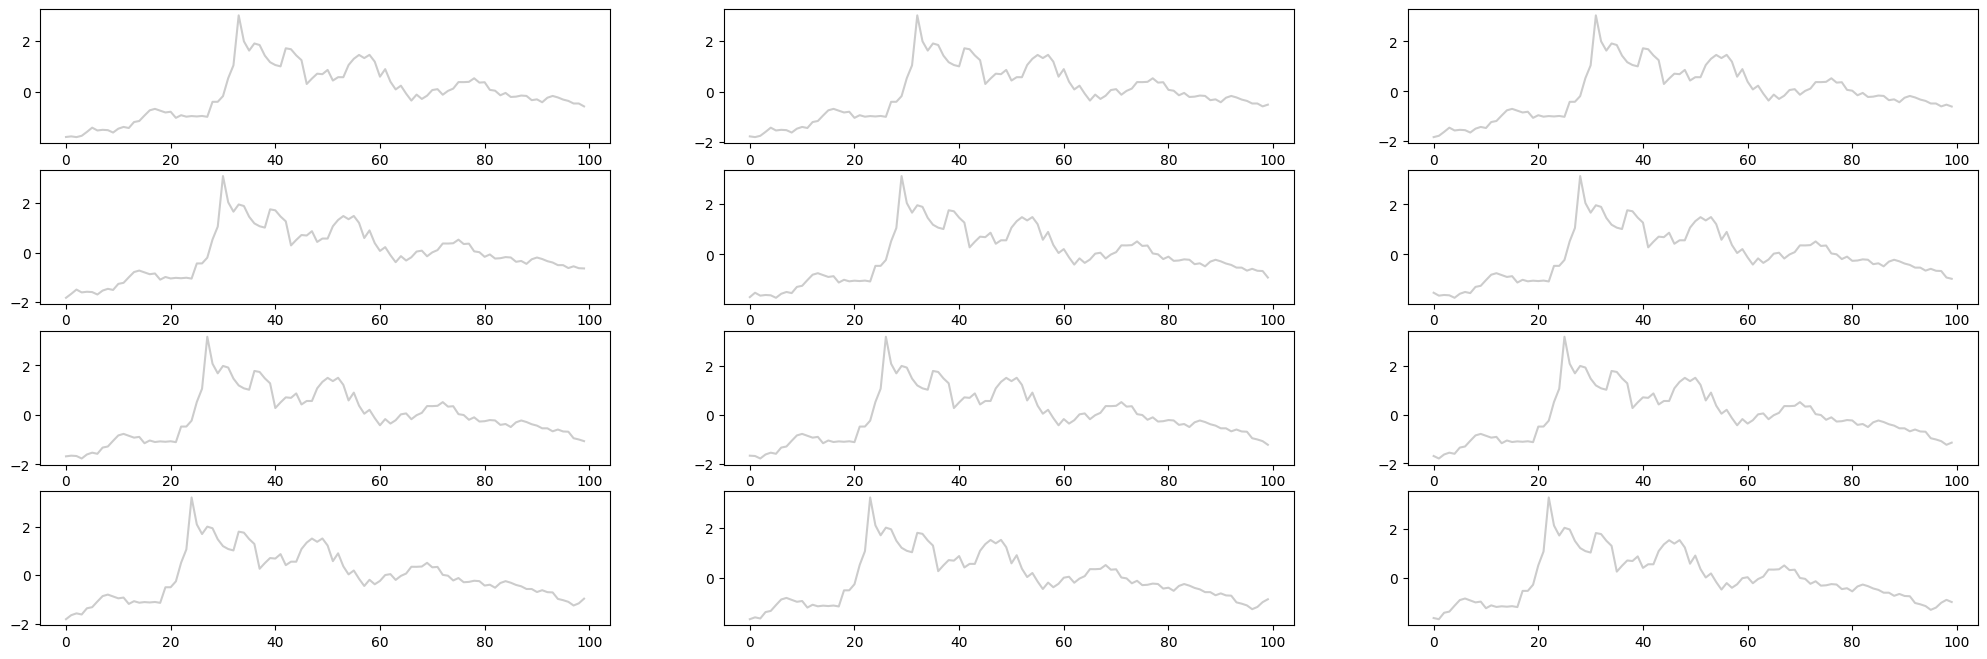

In [7]:
for yi in range(12):
    plt.subplot(4, 3, yi + 1)
    plt.plot(X[yi].ravel(), "k-", alpha=.2)

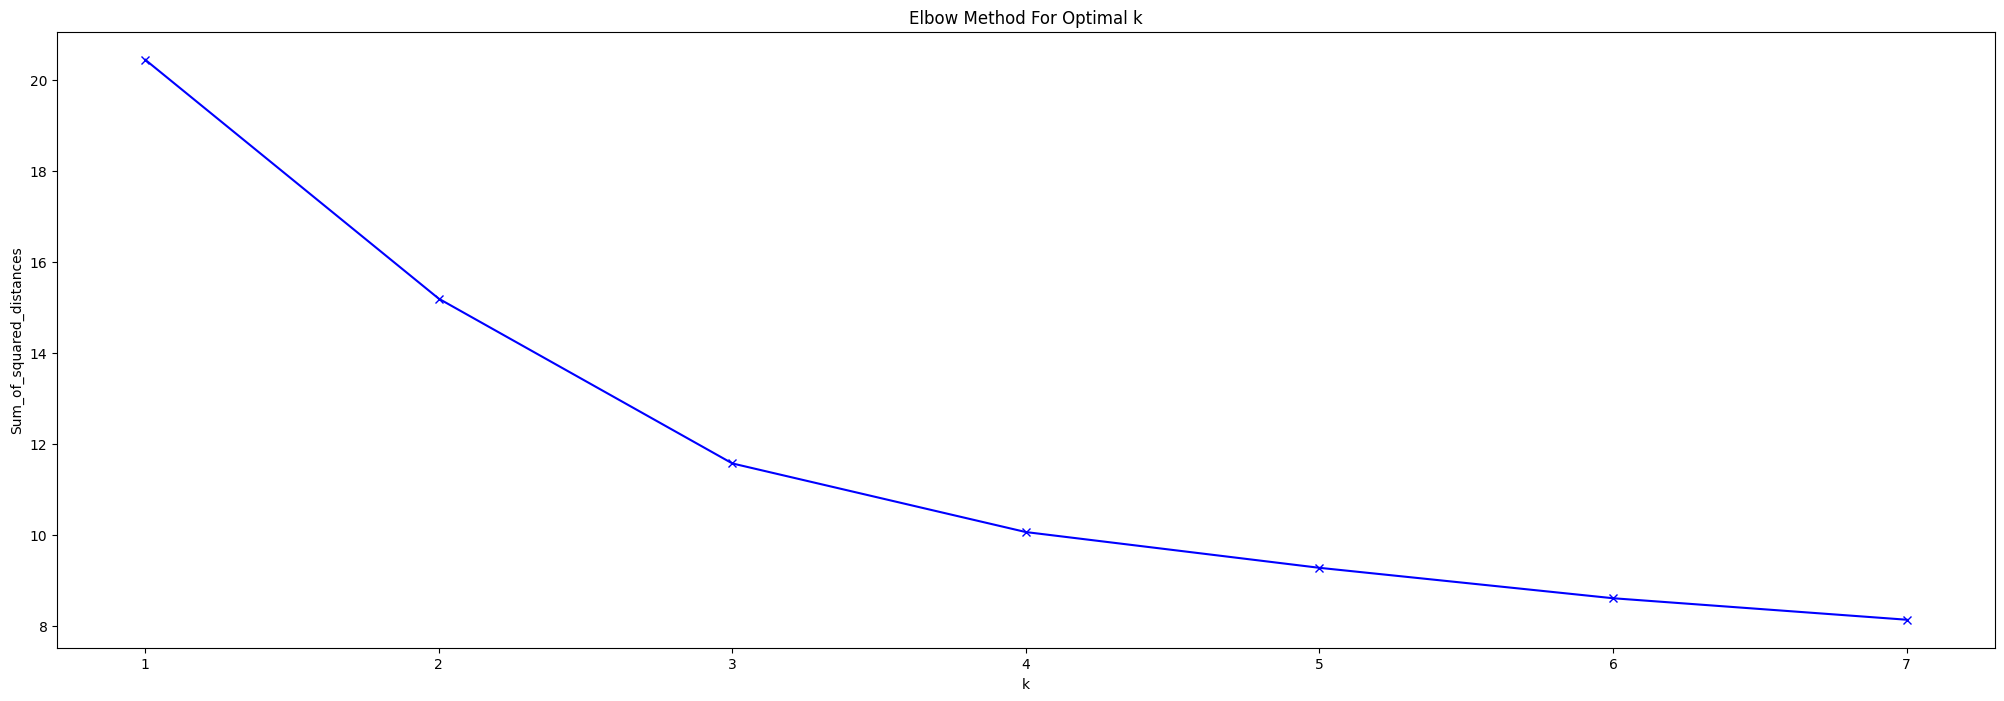

In [8]:
# Using sum of squared distances to decide cluster number
Sum_of_squared_distances = []
K = range(1,8)
for k in K:
    km = TimeSeriesKMeans(n_clusters=k,
                          n_init=2,
                          metric="dtw",
                          verbose=False,
                          max_iter_barycenter=10,
                          random_state=0)

    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

-----Euclidean k-means-----
Euclidean silhoutte: 0.26


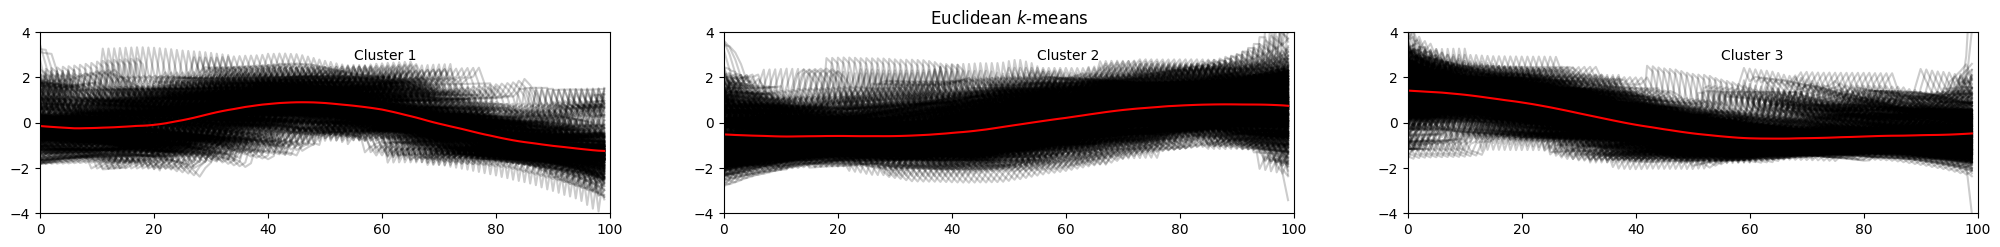

In [9]:
# Euclidean k-means
print("-----Euclidean k-means-----")
n_clusters=3
km = TimeSeriesKMeans(n_clusters=n_clusters, verbose=False, random_state=seed)
y_km = km.fit_predict(X)

print("Euclidean silhoutte: {:.2f}".format(silhouette_score(X, y_km, metric="euclidean")))

plt.figure()
for yi in range(n_clusters):
    plt.subplot(3, n_clusters, yi + 1)
    for xx in X[y_km == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

In [10]:
y_km.shape

(1916,)

DBA k-means
DBA silhoutte: 0.33


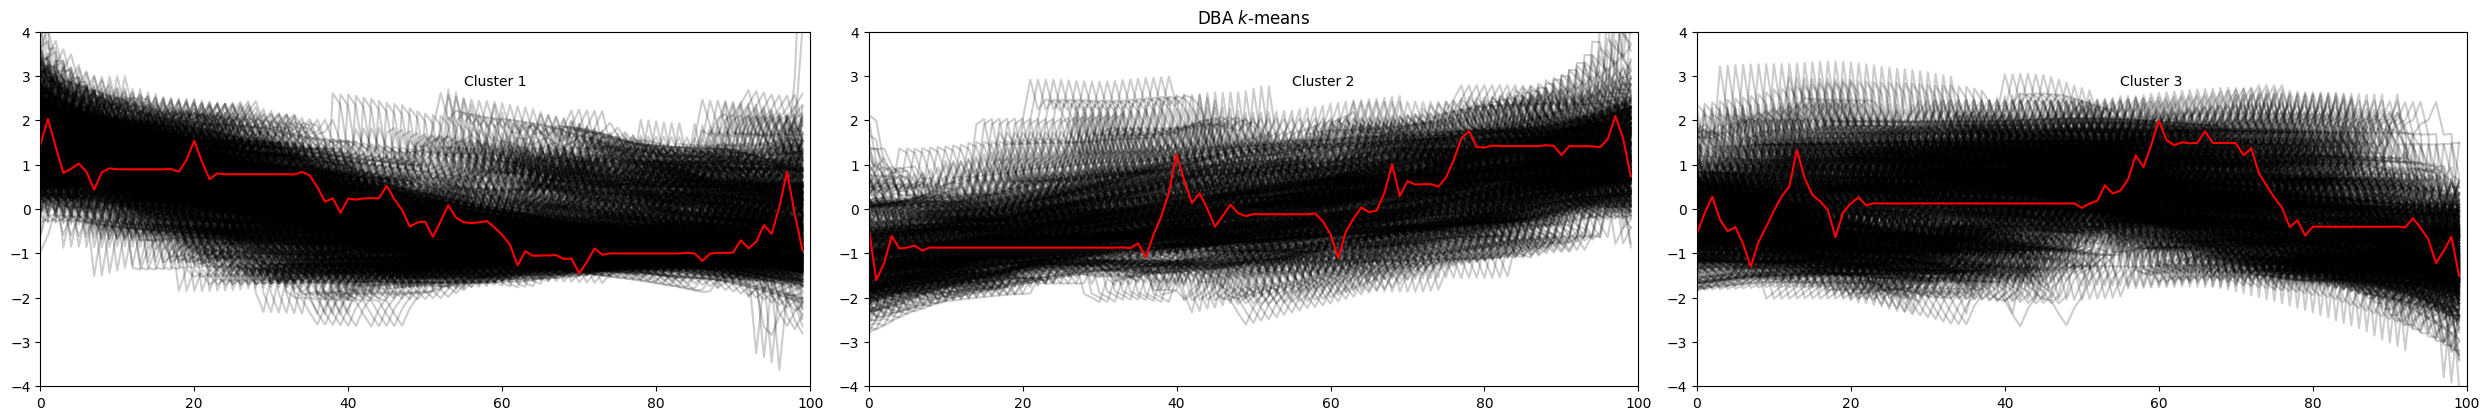

In [11]:
# DBA-k-means
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=n_clusters,
                          n_init=2,
                          metric="dtw",
                          verbose=False,
                          max_iter_barycenter=10,
                          random_state=seed)
y_dba_km = dba_km.fit_predict(X)
print("DBA silhoutte: {:.2f}".format(silhouette_score(X, y_dba_km, metric="dtw")))

for yi in range(n_clusters):
    plt.subplot(2, n_clusters, yi+1)
    for xx in X[y_dba_km == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")

plt.tight_layout()
plt.show()

In [12]:
y_dba_km.shape

(1916,)

In [13]:
cluster_labels = dba_km.labels_

cluster_0 = X[cluster_labels == 0]
cluster_1 = X[cluster_labels == 1]
cluster_2 = X[cluster_labels == 2]

In [14]:
print(cluster_0.shape)
print(cluster_1.shape)
print(cluster_2.shape)

(788, 100, 1)
(479, 100, 1)
(649, 100, 1)


# RNN

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

## 7:2:1

### Cluster 0

In [168]:
# Number of samples in cluster_0
num_samples = cluster_0.shape[0]

# Create an array of random indices for the samples
indices = np.random.permutation(num_samples)

# Calculate the number of samples for each set
num_train = int(0.7 * num_samples)
num_test = int(0.2 * num_samples)

# Split the data into train, test, validate sets
train_indices = indices[:num_train]
test_indices = indices[num_train:num_train+num_test]
val_indices = indices[num_train+num_test:]

# Create sublists to store the samples and corresponding labels
X_train = []
y_train = []
X_test = []
ytest = []
X_val = []
yval = []

# Create X_train and y_train
for i in train_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_train.append(sample)
    y_train.append(label)

# Create X_test and ytest
for i in test_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_test.append(sample)
    ytest.append(label)

# Create X_val and yval
for i in val_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_val.append(sample)
    yval.append(label)

# Convert lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train).reshape(-1)
X_test = np.array(X_test)
ytest = np.array(ytest).reshape(-1)
X_val = np.array(X_val)
yval = np.array(yval).reshape(-1)

# Check the shape of the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("ytest shape:", ytest.shape)
print("X_val shape:", X_val.shape)
print("yval shape:", yval.shape)

X_train shape: (551, 100, 1)
y_train shape: (551,)
X_test shape: (157, 100, 1)
ytest shape: (157,)
X_val shape: (80, 100, 1)
yval shape: (80,)


In [169]:
#Define LSTM Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [171]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
9/9 [==============================] - 1s 112ms/step - loss: 0.0023 - val_loss: 0.0015
Epoch 2/100
9/9 [==============================] - 1s 133ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 3/100
9/9 [==============================] - 1s 106ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 4/100
9/9 [==============================] - 1s 130ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 5/100
9/9 [==============================] - 1s 137ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 6/100
9/9 [==============================] - 1s 104ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 7/100
9/9 [==============================] - 1s 90ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 8/100
9/9 [==============================] - 1s 106ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 9/100
9/9 [==============================] - 1s 113ms/step - loss: 0.0023 - val_loss: 0.0015
Epoch 10/100
9/9 [==============================] - 1s 86ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 11/10

In [172]:
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

3/3 [==============================] - 0s 23ms/step


In [173]:
print('---------VALIDATE----------')

valid_mae = np.mean(np.abs(y_pred_val - yval))
print('MAE:', valid_mae)

valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
print('RMSE:', valid_rmse)

print('--------------------------')
print('---------TEST----------')

test_mae = np.mean(np.abs(y_pred - ytest))
print('MAE:', test_mae)

test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('RMSE:', test_rmse)

print('-------------------')

---------VALIDATE----------
MAE: 1.0691961008831161
RMSE: 1.3366798336145251
--------------------------
---------TEST----------
MAE: 0.9795396195566393
RMSE: 1.2286297590570712
-------------------


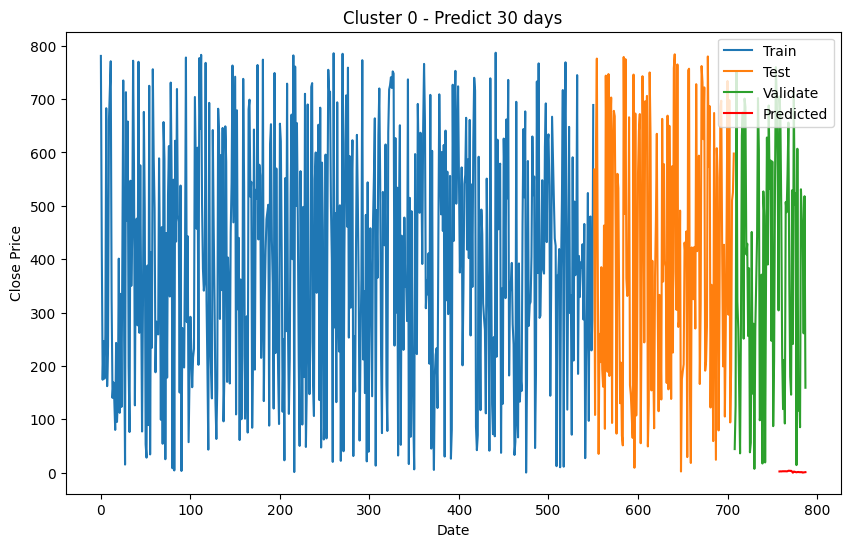

In [198]:
predicted_prices = cluster_0[-30:]
predicted_prices_reshaped = predicted_prices.reshape((-1, 100, 1))

# Tạo biểu đồ train, test, validate và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train_indices, label='Train')
plt.plot(range(num_train, num_train+len(test_indices)), test_indices, label='Test')
plt.plot(range(num_train+num_test, num_train+num_test+len(val_indices)), val_indices, label='Validate')

plt.plot(range(len(cluster_0) - 30, len(cluster_0)), predicted_prices_reshaped[:, 0, 0], 'r', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Cluster 0 - Predict 30 days')
plt.legend()
plt.show()

In [187]:
predicted_prices_reshaped

array([[[2.07220238],
        [2.20898151],
        [2.00580074],
        ...,
        [0.16394762],
        [0.23346127],
        [0.36565837]],

       [[2.27523002],
        [2.06761188],
        [2.19138747],
        ...,
        [0.2565653 ],
        [0.39164953],
        [0.33492994]],

       [[2.14036876],
        [2.26737181],
        [2.34497011],
        ...,
        [0.42070559],
        [0.36250703],
        [0.46902293]],

       ...,

       [[0.32268694],
        [0.55555438],
        [0.76470503],
        ...,
        [0.52531505],
        [0.32668925],
        [0.48499706]],

       [[0.55476475],
        [0.76386639],
        [0.66353943],
        ...,
        [0.32595324],
        [0.48422395],
        [0.38789836]],

       [[0.76939328],
        [0.6689174 ],
        [0.49913179],
        ...,
        [0.48933576],
        [0.3928672 ],
        [0.12067502]]])

### Cluster 1

In [189]:
# Number of samples in cluster_1
num_samples1 = cluster_1.shape[0]

# Create an array of random indices for the samples
indices1 = np.random.permutation(num_samples1)

# Calculate the number of samples for each set
num_train1 = int(0.7 * num_samples1)
num_test1 = int(0.2 * num_samples1)

# Split the data into train, test, validate sets
train_indices1 = indices1[:num_train1]
test_indices1 = indices1[num_train1:num_train1+num_test1]
val_indices1 = indices1[num_train1+num_test1:]

# Create sublists to store the samples and corresponding labels
X_train1 = []
y_train1= []
X_test1 = []
ytest1 = []
X_val1 = []
yval1 = []

# Create X_train1 and y_train1
for i in train_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_train1.append(sample)
    y_train1.append(label)

# Create X_test1 and ytest1
for i in test_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_test1.append(sample)
    ytest1.append(label)

# Create X_val1 and yval1
for i in val_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_val1.append(sample)
    yval1.append(label)

# Convert lists to numpy arrays
X_train1 = np.array(X_train1)
y_train1= np.array(y_train1).reshape(-1)
X_test1 = np.array(X_test1)
ytest1 = np.array(ytest1).reshape(-1)
X_val1 = np.array(X_val1)
yval1 = np.array(yval1).reshape(-1)

# Check the shape of the datasets
print("X_train1 shape:", X_train1.shape)
print("y_train1shape:", y_train1.shape)
print("X_test1 shape:", X_test1.shape)
print("ytest1 shape:", ytest1.shape)
print("X_val1 shape:", X_val1.shape)
print("yval1 shape:", yval1.shape)

X_train1 shape: (335, 100, 1)
y_train1shape: (335,)
X_test1 shape: (95, 100, 1)
ytest1 shape: (95,)
X_val1 shape: (49, 100, 1)
yval1 shape: (49,)


In [190]:
#Define LSTM Model
model1 = Sequential()
model1.add(SimpleRNN(50, input_shape=(time_step, 1)))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error',optimizer='adam')

In [191]:
model1.fit(X_train1,y_train1,validation_data=(X_test1,ytest1),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
6/6 [==============================] - 3s 126ms/step - loss: 2.7669 - val_loss: 1.0549
Epoch 2/100
6/6 [==============================] - 0s 56ms/step - loss: 0.7548 - val_loss: 0.5409
Epoch 3/100
6/6 [==============================] - 0s 51ms/step - loss: 0.5848 - val_loss: 0.3974
Epoch 4/100
6/6 [==============================] - 0s 54ms/step - loss: 0.3714 - val_loss: 0.2131
Epoch 5/100
6/6 [==============================] - 0s 51ms/step - loss: 0.3024 - val_loss: 0.2115
Epoch 6/100
6/6 [==============================] - 0s 59ms/step - loss: 0.2639 - val_loss: 0.1601
Epoch 7/100
6/6 [==============================] - 0s 58ms/step - loss: 0.2110 - val_loss: 0.1571
Epoch 8/100
6/6 [==============================] - 0s 51ms/step - loss: 0.1974 - val_loss: 0.1343
Epoch 9/100
6/6 [==============================] - 0s 50ms/step - loss: 0.1655 - val_loss: 0.1127
Epoch 10/100
6/6 [==============================] - 0s 60ms/step - loss: 0.1552 - val_loss: 0.1038
Epoch 11/100
6/6 [

In [192]:
train_predict1=model.predict(X_train1)
y_pred1=model.predict(X_test1)
y_pred_val1=model.predict(X_val1)

2/2 [==============================] - 0s 11ms/step


In [193]:
print('---------VALIDATE----------')

valid_mae1 = np.mean(np.abs(y_pred_val1 - yval1))
print('MAE:', valid_mae1)

valid_rmse1 = np.sqrt(np.mean((y_pred_val1 - yval1)**2))
print('RMSE:', valid_rmse1)

print('--------------------------')
print('---------TEST----------')

test_mae1 = np.mean(np.abs(y_pred1 - ytest1))
print('MAE:', test_mae1)

test_rmse1 = np.sqrt(np.mean((y_pred1 - ytest1)**2))
print('RMSE:', test_rmse1)

print('-------------------')

---------VALIDATE----------
MAE: 0.9738477486343751
RMSE: 1.2654328451712382
--------------------------
---------TEST----------
MAE: 0.9357244322165484
RMSE: 1.2064605273929467
-------------------


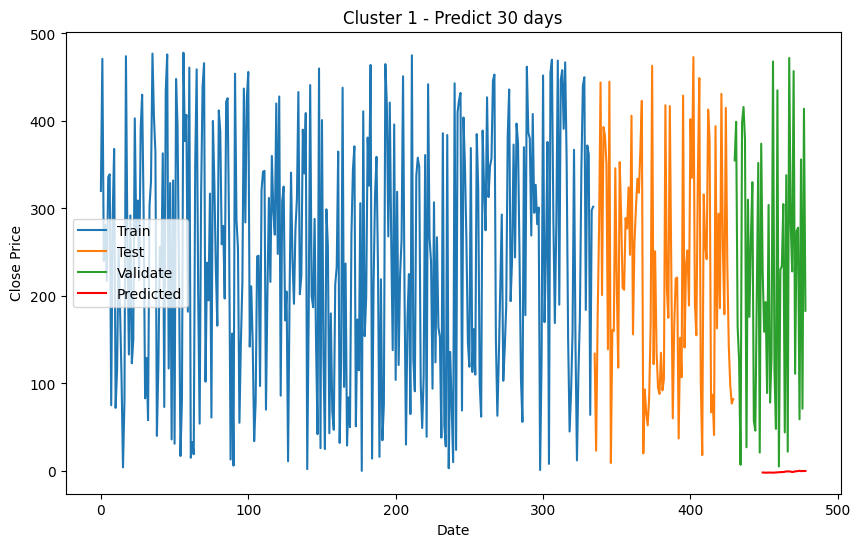

In [197]:
predicted_prices1 = cluster_1[-30:]
predicted_prices_reshaped1 = predicted_prices1.reshape((-1, 100, 1))

# Tạo biểu đồ train, test, validate và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train_indices1, label='Train')
plt.plot(range(num_train1, num_train1+len(test_indices1)), test_indices1, label='Test')
plt.plot(range(num_train1+num_test1, num_train1+num_test1+len(val_indices1)), val_indices1, label='Validate')
plt.plot(range(len(cluster_1) - 30, len(cluster_1)), predicted_prices_reshaped1[:, 0, 0], 'r', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Cluster 1 - Predict 30 days')
plt.legend()
plt.show()

### Cluster 2

In [200]:
# Number of samples in cluster_2
num_samples2 = cluster_2.shape[0]

# Create an array of random indices for the samples
indices2 = np.random.permutation(num_samples2)

# Calculate the number of samples for each set
num_train2 = int(0.7 * num_samples2)
num_test2 = int(0.2 * num_samples2)

# Split the data into train, test, validate sets
train_indices2 = indices2[:num_train2]
test_indices2 = indices2[num_train2:num_train2+num_test2]
val_indices2 = indices2[num_train2+num_test2:]

# Create sublists to store the samples and corresponding labels
X_train2 = []
y_train2= []
X_test2 = []
ytest2 = []
X_val2 = []
yval2 = []

# Create X_train2 and y_train
for i in train_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_train2.append(sample)
    y_train2.append(label)

# Create X_test2 and ytest2
for i in test_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_test2.append(sample)
    ytest2.append(label)

# Create X_val2 and yval2
for i in val_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_val2.append(sample)
    yval2.append(label)

# Convert lists to numpy arrays
X_train2 = np.array(X_train2)
y_train2= np.array(y_train2).reshape(-1)
X_test2 = np.array(X_test2)
ytest2 = np.array(ytest2).reshape(-1)
X_val2 = np.array(X_val2)
yval2 = np.array(yval2).reshape(-1)

# Check the shape of the datasets
print("X_train2 shape:", X_train2.shape)
print("y_train2shape:", y_train2.shape)
print("X_test2 shape:", X_test2.shape)
print("ytest2 shape:", ytest2.shape)
print("X_val2 shape:", X_val2.shape)
print("yval2 shape:", yval2.shape)

X_train2 shape: (454, 100, 1)
y_train2shape: (454,)
X_test2 shape: (129, 100, 1)
ytest2 shape: (129,)
X_val2 shape: (66, 100, 1)
yval2 shape: (66,)


In [201]:
#Define LSTM Model
model2 = Sequential()
model2.add(SimpleRNN(50, input_shape=(time_step, 1)))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error',optimizer='adam')

In [202]:
model2.fit(X_train2,y_train2,validation_data=(X_test2,ytest2),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
8/8 [==============================] - 3s 170ms/step - loss: 0.8594 - val_loss: 0.2038
Epoch 2/100
8/8 [==============================] - 1s 70ms/step - loss: 0.2397 - val_loss: 0.0995
Epoch 3/100
8/8 [==============================] - 1s 64ms/step - loss: 0.1018 - val_loss: 0.0606
Epoch 4/100
8/8 [==============================] - 1s 69ms/step - loss: 0.0732 - val_loss: 0.0282
Epoch 5/100
8/8 [==============================] - 1s 72ms/step - loss: 0.0480 - val_loss: 0.0251
Epoch 6/100
8/8 [==============================] - 1s 72ms/step - loss: 0.0390 - val_loss: 0.0169
Epoch 7/100
8/8 [==============================] - 1s 65ms/step - loss: 0.0315 - val_loss: 0.0139
Epoch 8/100
8/8 [==============================] - 0s 51ms/step - loss: 0.0265 - val_loss: 0.0124
Epoch 9/100
8/8 [==============================] - 0s 42ms/step - loss: 0.0224 - val_loss: 0.0108
Epoch 10/100
8/8 [==============================] - 0s 46ms/step - loss: 0.0190 - val_loss: 0.0095
Epoch 11/100
8/8 [

In [203]:
train_predict2 = model2.predict(X_train2)
y_pred2 = model2.predict(X_test2)
y_pred_val2 = model2.predict(X_val2)

3/3 [==============================] - 0s 7ms/step


In [204]:
print('---------VALIDATE----------')

valid_mae2 = np.mean(np.abs(y_pred_val2 - yval2))
print('MAE:', valid_mae2)

valid_rmse2 = np.sqrt(np.mean((y_pred_val2 - yval2)**2))
print('RMSE:', valid_rmse2)

print('--------------------------')
print('---------TEST----------')

test_mae2 = np.mean(np.abs(y_pred2 - ytest2))
print('MAE:', test_mae2)

test_rmse2 = np.sqrt(np.mean((y_pred2 - ytest2)**2))
print('RMSE:', test_rmse2)

print('-------------------')

---------VALIDATE----------
MAE: 0.7354115966818502
RMSE: 0.9418512656911391
--------------------------
---------TEST----------
MAE: 0.7012407478388636
RMSE: 0.9058817678860809
-------------------


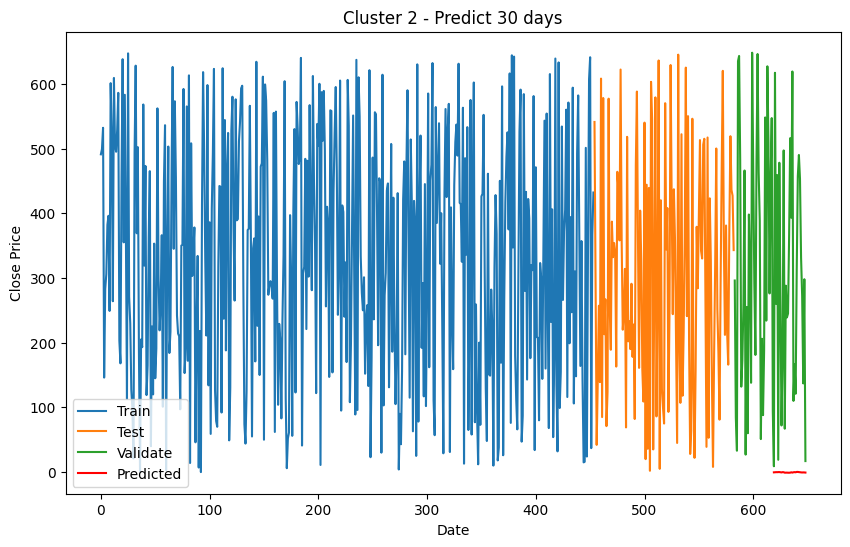

In [211]:
predicted_prices2 = cluster_2[-30:]
predicted_prices_reshaped2 = predicted_prices2.reshape((-1, 100, 1))

# Tạo biểu đồ train, test, validate và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train_indices2, label='Train')
plt.plot(range(num_train2, num_train2+len(test_indices2)), test_indices2, label='Test')
plt.plot(range(num_train2+num_test2, num_train2+num_test2+len(val_indices2)), val_indices2, label='Validate')
plt.plot(range(len(cluster_2) - 30, len(cluster_2)), predicted_prices_reshaped2[:, 0, 0], 'r', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Cluster 2 - Predict 30 days')
plt.legend()
plt.show()

###MAE - RMSE

In [ ]:
print('---------VALIDATE----------')
rnn_val_mae =  (valid_mae + valid_mae1 + valid_mae2) / 3
rnn_val_rmse = (valid_rmse + valid_rmse1 + valid_rmse2) / 3
print("Validate mae:",rnn_val_mae)
print("Validate rmse:",rnn_val_rmse)

print('---------------------------')
print('---------TEST--------------')
rnn_test_mae =  (test_mae + test_mae1 + test_mae2) / 3
rnn_test_rmse = (test_rmse + test_rmse1 + test_rmse2) / 3
print("Test mae:",rnn_test_mae)
print("Test rmse:",rnn_test_rmse)
print('---------------------------')

## 5:3:2

### Cluster 0

In [ ]:
# Number of samples in cluster_0
num_samples = cluster_0.shape[0]

# Create an array of random indices for the samples
indices = np.random.permutation(num_samples)

# Calculate the number of samples for each set
num_train = int(0.5 * num_samples)
num_test = int(0.3 * num_samples)

# Split the data into train, test, validate sets
train_indices = indices[:num_train]
test_indices = indices[num_train:num_train+num_test]
val_indices = indices[num_train+num_test:]

# Create sublists to store the samples and corresponding labels
X_train = []
y_train = []
X_test = []
ytest = []
X_val = []
yval = []

# Create X_train and y_train
for i in train_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_train.append(sample)
    y_train.append(label)

# Create X_test and ytest
for i in test_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_test.append(sample)
    ytest.append(label)

# Create X_val and yval
for i in val_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_val.append(sample)
    yval.append(label)

# Convert lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train).reshape(-1)
X_test = np.array(X_test)
ytest = np.array(ytest).reshape(-1)
X_val = np.array(X_val)
yval = np.array(yval).reshape(-1)

# Check the shape of the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("ytest shape:", ytest.shape)
print("X_val shape:", X_val.shape)
print("yval shape:", yval.shape)

In [ ]:
#Define LSTM Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

In [ ]:
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

In [ ]:
print('---------VALIDATE----------')

valid_mae = np.mean(np.abs(y_pred_val - yval))
print('MAE:', valid_mae)

valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
print('RMSE:', valid_rmse)

print('--------------------------')
print('---------TEST----------')

test_mae = np.mean(np.abs(y_pred - ytest))
print('MAE:', test_mae)

test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('RMSE:', test_rmse)

print('-------------------')

### Cluster 1

In [ ]:
# Number of samples in cluster_1
num_samples1 = cluster_1.shape[0]

# Create an array of random indices for the samples
indices1 = np.random.permutation(num_samples1)

# Calculate the number of samples for each set
num_train1 = int(0.5 * num_samples1)
num_test1 = int(0.3 * num_samples1)

# Split the data into train, test, validate sets
train_indices1 = indices1[:num_train1]
test_indices1 = indices1[num_train1:num_train1+num_test1]
val_indices1 = indices1[num_train1+num_test1:]

# Create sublists to store the samples and corresponding labels
X_train1 = []
y_train1= []
X_test1 = []
ytest1 = []
X_val1 = []
yval1 = []

# Create X_train1 and y_train
for i in train_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_train1.append(sample)
    y_train1.append(label)

# Create X_test1 and ytest1
for i in test_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_test1.append(sample)
    ytest1.append(label)

# Create X_val1 and yval1
for i in val_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_val1.append(sample)
    yval1.append(label)

# Convert lists to numpy arrays
X_train1 = np.array(X_train1)
y_train1= np.array(y_train1).reshape(-1)
X_test1 = np.array(X_test1)
ytest1 = np.array(ytest1).reshape(-1)
X_val1 = np.array(X_val1)
yval1 = np.array(yval1).reshape(-1)

# Check the shape of the datasets
print("X_train1 shape:", X_train1.shape)
print("y_train1shape:", y_train1.shape)
print("X_test1 shape:", X_test1.shape)
print("ytest1 shape:", ytest1.shape)
print("X_val1 shape:", X_val1.shape)
print("yval1 shape:", yval1.shape)

In [ ]:
#Define LSTM Model
model1 = Sequential()
model1.add(SimpleRNN(50, input_shape=(time_step, 1)))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model1.fit(X_train1,y_train1,validation_data=(X_test1,ytest1),epochs=100,batch_size=64,verbose=1)

In [ ]:
train_predict1=model.predict(X_train1)
y_pred1=model.predict(X_test1)
y_pred_val1=model.predict(X_val1)

In [ ]:
print('---------VALIDATE----------')

valid_mae1 = np.mean(np.abs(y_pred_val1 - yval1))
print('MAE:', valid_mae1)

valid_rmse1 = np.sqrt(np.mean((y_pred_val1 - yval1)**2))
print('RMSE:', valid_rmse1)

print('--------------------------')
print('---------TEST----------')

test_mae1 = np.mean(np.abs(y_pred1 - ytest1))
print('MAE:', test_mae1)

test_rmse1 = np.sqrt(np.mean((y_pred1 - ytest1)**2))
print('RMSE:', test_rmse1)

print('-------------------')

### Cluster 2

In [ ]:
# Number of samples in cluster_2
num_samples2 = cluster_2.shape[0]

# Create an array of random indices for the samples
indices2 = np.random.permutation(num_samples2)

# Calculate the number of samples for each set
num_train2 = int(0.5 * num_samples2)
num_test2 = int(0.3 * num_samples2)

# Split the data into train, test, validate sets
train_indices2 = indices2[:num_train2]
test_indices2 = indices2[num_train2:num_train2+num_test2]
val_indices2 = indices2[num_train2+num_test2:]

# Create sublists to store the samples and corresponding labels
X_train2 = []
y_train2= []
X_test2 = []
ytest2 = []
X_val2 = []
yval2 = []

# Create X_train2 and y_train
for i in train_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_train2.append(sample)
    y_train2.append(label)

# Create X_test2 and ytest2
for i in test_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_test2.append(sample)
    ytest2.append(label)

# Create X_val2 and yval2
for i in val_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_val2.append(sample)
    yval2.append(label)

# Convert lists to numpy arrays
X_train2 = np.array(X_train2)
y_train2= np.array(y_train2).reshape(-1)
X_test2 = np.array(X_test2)
ytest2 = np.array(ytest2).reshape(-1)
X_val2 = np.array(X_val2)
yval2 = np.array(yval2).reshape(-1)

# Check the shape of the datasets
print("X_train2 shape:", X_train2.shape)
print("y_train2shape:", y_train2.shape)
print("X_test2 shape:", X_test2.shape)
print("ytest2 shape:", ytest2.shape)
print("X_val2 shape:", X_val2.shape)
print("yval2 shape:", yval2.shape)

In [ ]:
#Define LSTM Model
model2 = Sequential()
model2.add(SimpleRNN(50, input_shape=(time_step, 1)))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model2.fit(X_train2,y_train2,validation_data=(X_test2,ytest2),epochs=100,batch_size=64,verbose=1)

In [ ]:
train_predict2 = model2.predict(X_train2)
y_pred2 = model2.predict(X_test2)
y_pred_val2 = model2.predict(X_val2)

In [ ]:
print('---------VALIDATE----------')
valid_mae2 = np.mean(np.abs(y_pred_val2 - yval2))
print('MAE:', valid_mae2)

valid_rmse2 = np.sqrt(np.mean((y_pred_val2 - yval2)**2))
print('RMSE:', valid_rmse2)

print('--------------------------')
print('---------TEST----------')

test_mae2 = np.mean(np.abs(y_pred2 - ytest2))
print('MAE:', test_mae2)

test_rmse2 = np.sqrt(np.mean((y_pred2 - ytest2)**2))
print('RMSE:', test_rmse2)

print('-------------------')

###MAE - RMSE

In [ ]:
print('---------VALIDATE----------')
rnn_val_mae =  (valid_mae + valid_mae1 + valid_mae2) / 3
rnn_val_rmse = (valid_rmse + valid_rmse1 + valid_rmse2) / 3
print("Validate mae:",rnn_val_mae)
print("Validate rmse:",rnn_val_rmse)

print('---------------------------')
print('---------TEST--------------')
rnn_test_mae =  (test_mae + test_mae1 + test_mae2) / 3
rnn_test_rmse = (test_rmse + test_rmse1 + test_rmse2) / 3
print("Test mae:",rnn_test_mae)
print("Test rmse:",rnn_test_rmse)
print('---------------------------')

## 6:2:2

### Cluster 0

In [ ]:
# Number of samples in cluster_0
num_samples = cluster_0.shape[0]

# Create an array of random indices for the samples
indices = np.random.permutation(num_samples)

# Calculate the number of samples for each set
num_train = int(0.6 * num_samples)
num_test = int(0.2 * num_samples)

# Split the data into train, test, validate sets
train_indices = indices[:num_train]
test_indices = indices[num_train:num_train+num_test]
val_indices = indices[num_train+num_test:]

# Create sublists to store the samples and corresponding labels
X_train = []
y_train = []
X_test = []
ytest = []
X_val = []
yval = []

# Create X_train and y_train
for i in train_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_train.append(sample)
    y_train.append(label)

# Create X_test and ytest
for i in test_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_test.append(sample)
    ytest.append(label)

# Create X_val and yval
for i in val_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_val.append(sample)
    yval.append(label)

# Convert lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train).reshape(-1)
X_test = np.array(X_test)
ytest = np.array(ytest).reshape(-1)
X_val = np.array(X_val)
yval = np.array(yval).reshape(-1)

# Check the shape of the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("ytest shape:", ytest.shape)
print("X_val shape:", X_val.shape)
print("yval shape:", yval.shape)

In [ ]:
#Define LSTM Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

In [ ]:
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

In [ ]:
print('---------VALIDATE----------')

valid_mae = np.mean(np.abs(y_pred_val - yval))
print('MAE:', valid_mae)

valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
print('RMSE:', valid_rmse)

print('--------------------------')
print('---------TEST----------')

test_mae = np.mean(np.abs(y_pred - ytest))
print('MAE:', test_mae)

test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('RMSE:', test_rmse)

print('-------------------')

### Cluster 1

In [ ]:
# Number of samples in cluster_1
num_samples1 = cluster_1.shape[0]

# Create an array of random indices for the samples
indices1 = np.random.permutation(num_samples1)

# Calculate the number of samples for each set
num_train1 = int(0.6 * num_samples1)
num_test1 = int(0.2 * num_samples1)

# Split the data into train, test, validate sets
train_indices1 = indices1[:num_train1]
test_indices1 = indices1[num_train1:num_train1+num_test1]
val_indices1 = indices1[num_train1+num_test1:]

# Create sublists to store the samples and corresponding labels
X_train1 = []
y_train1= []
X_test1 = []
ytest1 = []
X_val1 = []
yval1 = []

# Create X_train1 and y_train
for i in train_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_train1.append(sample)
    y_train1.append(label)

# Create X_test1 and ytest1
for i in test_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_test1.append(sample)
    ytest1.append(label)

# Create X_val1 and yval1
for i in val_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_val1.append(sample)
    yval1.append(label)

# Convert lists to numpy arrays
X_train1 = np.array(X_train1)
y_train1= np.array(y_train1).reshape(-1)
X_test1 = np.array(X_test1)
ytest1 = np.array(ytest1).reshape(-1)
X_val1 = np.array(X_val1)
yval1 = np.array(yval1).reshape(-1)

# Check the shape of the datasets
print("X_train1 shape:", X_train1.shape)
print("y_train1shape:", y_train1.shape)
print("X_test1 shape:", X_test1.shape)
print("ytest1 shape:", ytest1.shape)
print("X_val1 shape:", X_val1.shape)
print("yval1 shape:", yval1.shape)

In [ ]:
#Define LSTM Model
model1 = Sequential()
model1.add(SimpleRNN(50, input_shape=(time_step, 1)))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model1.fit(X_train1,y_train1,validation_data=(X_test1,ytest1),epochs=100,batch_size=64,verbose=1)

In [ ]:
train_predict1=model.predict(X_train1)
y_pred1=model.predict(X_test1)
y_pred_val1=model.predict(X_val1)

In [ ]:
print('---------VALIDATE----------')

valid_mae1 = np.mean(np.abs(y_pred_val1 - yval1))
print('MAE:', valid_mae1)

valid_rmse1 = np.sqrt(np.mean((y_pred_val1 - yval1)**2))
print('RMSE:', valid_rmse1)

print('--------------------------')
print('---------TEST----------')

test_mae1 = np.mean(np.abs(y_pred1 - ytest1))
print('MAE:', test_mae1)

test_rmse1 = np.sqrt(np.mean((y_pred1 - ytest1)**2))
print('RMSE:', test_rmse1)

print('-------------------')

### Cluster 2

In [ ]:
# Number of samples in cluster_2
num_samples2 = cluster_2.shape[0]

# Create an array of random indices for the samples
indices2 = np.random.permutation(num_samples2)

# Calculate the number of samples for each set
num_train2 = int(0.6 * num_samples2)
num_test2 = int(0.2 * num_samples2)

# Split the data into train, test, validate sets
train_indices2 = indices2[:num_train2]
test_indices2 = indices2[num_train2:num_train2+num_test2]
val_indices2 = indices2[num_train2+num_test2:]

# Create sublists to store the samples and corresponding labels
X_train2 = []
y_train2= []
X_test2 = []
ytest2 = []
X_val2 = []
yval2 = []

# Create X_train2 and y_train
for i in train_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_train2.append(sample)
    y_train2.append(label)

# Create X_test2 and ytest2
for i in test_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_test2.append(sample)
    ytest2.append(label)

# Create X_val2 and yval2
for i in val_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_val2.append(sample)
    yval2.append(label)

# Convert lists to numpy arrays
X_train2 = np.array(X_train2)
y_train2= np.array(y_train2).reshape(-1)
X_test2 = np.array(X_test2)
ytest2 = np.array(ytest2).reshape(-1)
X_val2 = np.array(X_val2)
yval2 = np.array(yval2).reshape(-1)

# Check the shape of the datasets
print("X_train2 shape:", X_train2.shape)
print("y_train2shape:", y_train2.shape)
print("X_test2 shape:", X_test2.shape)
print("ytest2 shape:", ytest2.shape)
print("X_val2 shape:", X_val2.shape)
print("yval2 shape:", yval2.shape)

In [ ]:
#Define LSTM Model
model2 = Sequential()
model2.add(SimpleRNN(50, input_shape=(time_step, 1)))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model2.fit(X_train2,y_train2,validation_data=(X_test2,ytest2),epochs=100,batch_size=64,verbose=1)

In [ ]:
train_predict2 = model2.predict(X_train2)
y_pred2 = model2.predict(X_test2)
y_pred_val2 = model2.predict(X_val2)

In [ ]:
print('---------VALIDATE----------')
valid_mae2 = np.mean(np.abs(y_pred_val2 - yval2))
print('MAE:', valid_mae2)

valid_rmse2 = np.sqrt(np.mean((y_pred_val2 - yval2)**2))
print('RMSE:', valid_rmse2)

print('--------------------------')
print('---------TEST----------')

test_mae2 = np.mean(np.abs(y_pred2 - ytest2))
print('MAE:', test_mae2)

test_rmse2 = np.sqrt(np.mean((y_pred2 - ytest2)**2))
print('RMSE:', test_rmse2)

print('-------------------')

###MAE - RMSE

In [ ]:
print('---------VALIDATE----------')
rnn_val_mae =  (valid_mae + valid_mae1 + valid_mae2) / 3
rnn_val_rmse = (valid_rmse + valid_rmse1 + valid_rmse2) / 3
print("Validate mae:",rnn_val_mae)
print("Validate rmse:",rnn_val_rmse)

print('---------------------------')
print('---------TEST--------------')
rnn_test_mae =  (test_mae + test_mae1 + test_mae2) / 3
rnn_test_rmse = (test_rmse + test_rmse1 + test_rmse2) / 3
print("Test mae:",rnn_test_mae)
print("Test rmse:",rnn_test_rmse)
print('---------------------------')

# LSTM

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Bidirectional

## 7:2:1

### Cluster 0

In [69]:
# Number of samples in cluster_0
num_samples = cluster_0.shape[0]

# Create an array of random indices for the samples
indices = np.random.permutation(num_samples)

# Calculate the number of samples for each set
num_train = int(0.7 * num_samples)
num_test = int(0.2 * num_samples)

# Split the data into train, test, validate sets
train_indices = indices[:num_train]
test_indices = indices[num_train:num_train+num_test]
val_indices = indices[num_train+num_test:]

# Create sublists to store the samples and corresponding labels
X_train = []
y_train = []
X_test = []
ytest = []
X_val = []
yval = []

# Create X_train and y_train
for i in train_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_train.append(sample)
    y_train.append(label)

# Create X_test and ytest
for i in test_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_test.append(sample)
    ytest.append(label)

# Create X_val and yval
for i in val_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_val.append(sample)
    yval.append(label)

# Convert lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train).reshape(-1)
X_test = np.array(X_test)
ytest = np.array(ytest).reshape(-1)
X_val = np.array(X_val)
yval = np.array(yval).reshape(-1)

# Check the shape of the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("ytest shape:", ytest.shape)
print("X_val shape:", X_val.shape)
print("yval shape:", yval.shape)

X_train shape: (551, 100, 1)
y_train shape: (551,)
X_test shape: (157, 100, 1)
ytest shape: (157,)
X_val shape: (80, 100, 1)
yval shape: (80,)


In [70]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [71]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
9/9 [==============================] - 10s 331ms/step - loss: 0.7484 - val_loss: 0.4182
Epoch 2/100
9/9 [==============================] - 2s 178ms/step - loss: 0.4838 - val_loss: 0.2926
Epoch 3/100
9/9 [==============================] - 2s 186ms/step - loss: 0.3778 - val_loss: 0.1895
Epoch 4/100
9/9 [==============================] - 2s 183ms/step - loss: 0.3269 - val_loss: 0.1830
Epoch 5/100
9/9 [==============================] - 2s 264ms/step - loss: 0.2939 - val_loss: 0.1785
Epoch 6/100
9/9 [==============================] - 3s 299ms/step - loss: 0.2729 - val_loss: 0.1365
Epoch 7/100
9/9 [==============================] - 2s 181ms/step - loss: 0.2479 - val_loss: 0.1217
Epoch 8/100
9/9 [==============================] - 2s 179ms/step - loss: 0.2282 - val_loss: 0.1072
Epoch 9/100
9/9 [==============================] - 2s 179ms/step - loss: 0.2097 - val_loss: 0.0918
Epoch 10/100
9/9 [==============================] - 2s 185ms/step - loss: 0.1949 - val_loss: 0.0793
Epoch 11

In [72]:
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

3/3 [==============================] - 0s 33ms/step


In [73]:
print('---------VALIDATE----------')

valid_mae = np.mean(np.abs(y_pred_val - yval))
print('MAE:', valid_mae)

valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
print('RMSE:', valid_rmse)

print('--------------------------')
print('---------TEST----------')

test_mae = np.mean(np.abs(y_pred - ytest))
print('MAE:', test_mae)

test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('RMSE:', test_rmse)

print('-------------------')

---------VALIDATE----------
MAE: 1.081567078113486
RMSE: 1.337303496937225
--------------------------
---------TEST----------
MAE: 1.1023077287861607
RMSE: 1.387884006062444
-------------------


### Cluster 1

In [74]:
# Number of samples in cluster_1
num_samples1 = cluster_1.shape[0]

# Create an array of random indices for the samples
indices1 = np.random.permutation(num_samples1)

# Calculate the number of samples for each set
num_train1 = int(0.7 * num_samples1)
num_test1 = int(0.2 * num_samples1)

# Split the data into train, test, validate sets
train_indices1 = indices1[:num_train1]
test_indices1 = indices1[num_train1:num_train1+num_test1]
val_indices1 = indices1[num_train1+num_test1:]

# Create sublists to store the samples and corresponding labels
X_train1 = []
y_train1= []
X_test1 = []
ytest1 = []
X_val1 = []
yval1 = []

# Create X_train1 and y_train1
for i in train_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_train1.append(sample)
    y_train1.append(label)

# Create X_test1 and ytest1
for i in test_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_test1.append(sample)
    ytest1.append(label)

# Create X_val1 and yval1
for i in val_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_val1.append(sample)
    yval1.append(label)

# Convert lists to numpy arrays
X_train1 = np.array(X_train1)
y_train1= np.array(y_train1).reshape(-1)
X_test1 = np.array(X_test1)
ytest1 = np.array(ytest1).reshape(-1)
X_val1 = np.array(X_val1)
yval1 = np.array(yval1).reshape(-1)

# Check the shape of the datasets
print("X_train1 shape:", X_train1.shape)
print("y_train1shape:", y_train1.shape)
print("X_test1 shape:", X_test1.shape)
print("ytest1 shape:", ytest1.shape)
print("X_val1 shape:", X_val1.shape)
print("yval1 shape:", yval1.shape)

X_train1 shape: (335, 100, 1)
y_train1shape: (335,)
X_test1 shape: (95, 100, 1)
ytest1 shape: (95,)
X_val1 shape: (49, 100, 1)
yval1 shape: (49,)


In [75]:
model1=Sequential()
model1.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model1.add(LSTM(50,return_sequences=True))
model1.add(LSTM(50))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error',optimizer='adam')

In [76]:
model1.fit(X_train1,y_train1,validation_data=(X_test1,ytest1),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
6/6 [==============================] - 9s 417ms/step - loss: 1.4820 - val_loss: 1.6745
Epoch 2/100
6/6 [==============================] - 1s 183ms/step - loss: 0.7655 - val_loss: 1.4343
Epoch 3/100
6/6 [==============================] - 1s 176ms/step - loss: 0.6192 - val_loss: 1.3010
Epoch 4/100
6/6 [==============================] - 1s 178ms/step - loss: 0.5582 - val_loss: 1.1085
Epoch 5/100
6/6 [==============================] - 1s 175ms/step - loss: 0.4823 - val_loss: 0.9525
Epoch 6/100
6/6 [==============================] - 1s 179ms/step - loss: 0.4167 - val_loss: 0.8815
Epoch 7/100
6/6 [==============================] - 1s 177ms/step - loss: 0.3584 - val_loss: 0.7140
Epoch 8/100
6/6 [==============================] - 2s 336ms/step - loss: 0.3434 - val_loss: 0.6659
Epoch 9/100
6/6 [==============================] - 2s 303ms/step - loss: 0.3046 - val_loss: 0.6164
Epoch 10/100
6/6 [==============================] - 1s 203ms/step - loss: 0.2809 - val_loss: 0.6033
Epoch 11/

In [77]:
train_predict1=model.predict(X_train1)
y_pred1=model.predict(X_test1)
y_pred_val1=model.predict(X_val1)

2/2 [==============================] - 0s 31ms/step


In [78]:
print('---------VALIDATE----------')

valid_mae1 = np.mean(np.abs(y_pred_val1 - yval1))
print('MAE:', valid_mae1)

valid_rmse1 = np.sqrt(np.mean((y_pred_val1 - yval1)**2))
print('RMSE:', valid_rmse1)

print('--------------------------')
print('---------TEST----------')

test_mae1 = np.mean(np.abs(y_pred1 - ytest1))
print('MAE:', test_mae1)

test_rmse1 = np.sqrt(np.mean((y_pred1 - ytest1)**2))
print('RMSE:', test_rmse1)

print('-------------------')

---------VALIDATE----------
MAE: 1.1623144435899169
RMSE: 1.5744818660628268
--------------------------
---------TEST----------
MAE: 1.1368525875432955
RMSE: 1.5409673925912344
-------------------


### Cluster 2

In [79]:
# Number of samples in cluster_2
num_samples2 = cluster_2.shape[0]

# Create an array of random indices for the samples
indices2 = np.random.permutation(num_samples2)

# Calculate the number of samples for each set
num_train2 = int(0.7 * num_samples2)
num_test2 = int(0.2 * num_samples2)

# Split the data into train, test, validate sets
train_indices2 = indices2[:num_train2]
test_indices2 = indices2[num_train2:num_train2+num_test2]
val_indices2 = indices2[num_train2+num_test2:]

# Create sublists to store the samples and corresponding labels
X_train2 = []
y_train2= []
X_test2 = []
ytest2 = []
X_val2 = []
yval2 = []

# Create X_train2 and y_train
for i in train_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_train2.append(sample)
    y_train2.append(label)

# Create X_test2 and ytest2
for i in test_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_test2.append(sample)
    ytest2.append(label)

# Create X_val2 and yval2
for i in val_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_val2.append(sample)
    yval2.append(label)

# Convert lists to numpy arrays
X_train2 = np.array(X_train2)
y_train2= np.array(y_train2).reshape(-1)
X_test2 = np.array(X_test2)
ytest2 = np.array(ytest2).reshape(-1)
X_val2 = np.array(X_val2)
yval2 = np.array(yval2).reshape(-1)

# Check the shape of the datasets
print("X_train2 shape:", X_train2.shape)
print("y_train2shape:", y_train2.shape)
print("X_test2 shape:", X_test2.shape)
print("ytest2 shape:", ytest2.shape)
print("X_val2 shape:", X_val2.shape)
print("yval2 shape:", yval2.shape)

X_train2 shape: (454, 100, 1)
y_train2shape: (454,)
X_test2 shape: (129, 100, 1)
ytest2 shape: (129,)
X_val2 shape: (66, 100, 1)
yval2 shape: (66,)


In [80]:
model2=Sequential()
model2.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model2.add(LSTM(50,return_sequences=True))
model2.add(LSTM(50))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error',optimizer='adam')

In [81]:
model2.fit(X_train2,y_train2,validation_data=(X_test2,ytest2),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
8/8 [==============================] - 10s 497ms/step - loss: 1.0683 - val_loss: 0.7323
Epoch 2/100
8/8 [==============================] - 1s 180ms/step - loss: 0.3998 - val_loss: 0.3356
Epoch 3/100
8/8 [==============================] - 1s 183ms/step - loss: 0.2986 - val_loss: 0.3630
Epoch 4/100
8/8 [==============================] - 1s 176ms/step - loss: 0.2729 - val_loss: 0.2772
Epoch 5/100
8/8 [==============================] - 1s 177ms/step - loss: 0.2343 - val_loss: 0.2814
Epoch 6/100
8/8 [==============================] - 1s 176ms/step - loss: 0.2077 - val_loss: 0.2205
Epoch 7/100
8/8 [==============================] - 1s 176ms/step - loss: 0.1860 - val_loss: 0.2131
Epoch 8/100
8/8 [==============================] - 2s 212ms/step - loss: 0.1674 - val_loss: 0.2190
Epoch 9/100
8/8 [==============================] - 3s 313ms/step - loss: 0.1587 - val_loss: 0.1757
Epoch 10/100
8/8 [==============================] - 2s 223ms/step - loss: 0.1422 - val_loss: 0.1659
Epoch 11

In [82]:
train_predict2 = model2.predict(X_train2)
y_pred2 = model2.predict(X_test2)
y_pred_val2 = model2.predict(X_val2)

3/3 [==============================] - 0s 30ms/step


In [83]:
print('---------VALIDATE----------')

valid_mae2 = np.mean(np.abs(y_pred_val2 - yval2))
print('MAE:', valid_mae2)

valid_rmse2 = np.sqrt(np.mean((y_pred_val2 - yval2)**2))
print('RMSE:', valid_rmse2)

print('--------------------------')
print('---------TEST----------')

test_mae2 = np.mean(np.abs(y_pred2 - ytest2))
print('MAE:', test_mae2)

test_rmse2 = np.sqrt(np.mean((y_pred2 - ytest2)**2))
print('RMSE:', test_rmse2)

print('-------------------')

---------VALIDATE----------
MAE: 0.901895087341942
RMSE: 1.1290853248317942
--------------------------
---------TEST----------
MAE: 0.833009247694146
RMSE: 1.040863419233097
-------------------


###MAE - RMSE

In [84]:
print('---------VALIDATE----------')
rnn_val_mae =  (valid_mae + valid_mae1 + valid_mae2) / 3
rnn_val_rmse = (valid_rmse + valid_rmse1 + valid_rmse2) / 3
print("Validate mae:",rnn_val_mae)
print("Validate rmse:",rnn_val_rmse)

print('---------------------------')
print('---------TEST--------------')
rnn_test_mae =  (test_mae + test_mae1 + test_mae2) / 3
rnn_test_rmse = (test_rmse + test_rmse1 + test_rmse2) / 3
print("Test mae:",rnn_test_mae)
print("Test rmse:",rnn_test_rmse)
print('---------------------------')

---------VALIDATE----------
Validate mae: 1.0485922030151151
Validate rmse: 1.3469568959439489
---------------------------
---------TEST--------------
Test mae: 1.0240565213412005
Test rmse: 1.3232382726289251
---------------------------


## 5:3:2

### Cluster 0

In [85]:
# Number of samples in cluster_0
num_samples = cluster_0.shape[0]

# Create an array of random indices for the samples
indices = np.random.permutation(num_samples)

# Calculate the number of samples for each set
num_train = int(0.5 * num_samples)
num_test = int(0.3 * num_samples)

# Split the data into train, test, validate sets
train_indices = indices[:num_train]
test_indices = indices[num_train:num_train+num_test]
val_indices = indices[num_train+num_test:]

# Create sublists to store the samples and corresponding labels
X_train = []
y_train = []
X_test = []
ytest = []
X_val = []
yval = []

# Create X_train and y_train
for i in train_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_train.append(sample)
    y_train.append(label)

# Create X_test and ytest
for i in test_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_test.append(sample)
    ytest.append(label)

# Create X_val and yval
for i in val_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_val.append(sample)
    yval.append(label)

# Convert lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train).reshape(-1)
X_test = np.array(X_test)
ytest = np.array(ytest).reshape(-1)
X_val = np.array(X_val)
yval = np.array(yval).reshape(-1)

# Check the shape of the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("ytest shape:", ytest.shape)
print("X_val shape:", X_val.shape)
print("yval shape:", yval.shape)

X_train shape: (394, 100, 1)
y_train shape: (394,)
X_test shape: (236, 100, 1)
ytest shape: (236,)
X_val shape: (158, 100, 1)
yval shape: (158,)


In [86]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [87]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
7/7 [==============================] - 9s 384ms/step - loss: 0.9463 - val_loss: 0.5204
Epoch 2/100
7/7 [==============================] - 1s 192ms/step - loss: 0.5705 - val_loss: 0.3763
Epoch 3/100
7/7 [==============================] - 1s 198ms/step - loss: 0.4368 - val_loss: 0.2999
Epoch 4/100
7/7 [==============================] - 1s 203ms/step - loss: 0.3744 - val_loss: 0.2710
Epoch 5/100
7/7 [==============================] - 1s 197ms/step - loss: 0.3735 - val_loss: 0.2583
Epoch 6/100
7/7 [==============================] - 1s 194ms/step - loss: 0.3397 - val_loss: 0.2251
Epoch 7/100
7/7 [==============================] - 2s 289ms/step - loss: 0.3352 - val_loss: 0.2057
Epoch 8/100
7/7 [==============================] - 2s 315ms/step - loss: 0.2942 - val_loss: 0.1969
Epoch 9/100
7/7 [==============================] - 2s 214ms/step - loss: 0.2724 - val_loss: 0.1801
Epoch 10/100
7/7 [==============================] - 1s 190ms/step - loss: 0.2543 - val_loss: 0.1673
Epoch 11/

In [88]:
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

5/5 [==============================] - 0s 39ms/step


In [89]:
print('---------VALIDATE----------')

valid_mae = np.mean(np.abs(y_pred_val - yval))
print('MAE:', valid_mae)

valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
print('RMSE:', valid_rmse)

print('--------------------------')
print('---------TEST----------')

test_mae = np.mean(np.abs(y_pred - ytest))
print('MAE:', test_mae)

test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('RMSE:', test_rmse)

print('-------------------')

---------VALIDATE----------
MAE: 1.0642878552785182
RMSE: 1.3298232836501955
--------------------------
---------TEST----------
MAE: 1.0295747453412665
RMSE: 1.3192025935380647
-------------------


### Cluster 1

In [90]:
# Number of samples in cluster_1
num_samples1 = cluster_1.shape[0]

# Create an array of random indices for the samples
indices1 = np.random.permutation(num_samples1)

# Calculate the number of samples for each set
num_train1 = int(0.5 * num_samples1)
num_test1 = int(0.3 * num_samples1)

# Split the data into train, test, validate sets
train_indices1 = indices1[:num_train1]
test_indices1 = indices1[num_train1:num_train1+num_test1]
val_indices1 = indices1[num_train1+num_test1:]

# Create sublists to store the samples and corresponding labels
X_train1 = []
y_train1= []
X_test1 = []
ytest1 = []
X_val1 = []
yval1 = []

# Create X_train1 and y_train
for i in train_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_train1.append(sample)
    y_train1.append(label)

# Create X_test1 and ytest1
for i in test_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_test1.append(sample)
    ytest1.append(label)

# Create X_val1 and yval1
for i in val_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_val1.append(sample)
    yval1.append(label)

# Convert lists to numpy arrays
X_train1 = np.array(X_train1)
y_train1= np.array(y_train1).reshape(-1)
X_test1 = np.array(X_test1)
ytest1 = np.array(ytest1).reshape(-1)
X_val1 = np.array(X_val1)
yval1 = np.array(yval1).reshape(-1)

# Check the shape of the datasets
print("X_train1 shape:", X_train1.shape)
print("y_train1shape:", y_train1.shape)
print("X_test1 shape:", X_test1.shape)
print("ytest1 shape:", ytest1.shape)
print("X_val1 shape:", X_val1.shape)
print("yval1 shape:", yval1.shape)

X_train1 shape: (239, 100, 1)
y_train1shape: (239,)
X_test1 shape: (143, 100, 1)
ytest1 shape: (143,)
X_val1 shape: (97, 100, 1)
yval1 shape: (97,)


In [91]:
model1=Sequential()
model1.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model1.add(LSTM(50,return_sequences=True))
model1.add(LSTM(50))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error',optimizer='adam')

In [92]:
model1.fit(X_train1,y_train1,validation_data=(X_test1,ytest1),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
4/4 [==============================] - 8s 597ms/step - loss: 2.1598 - val_loss: 1.6127
Epoch 2/100
4/4 [==============================] - 1s 218ms/step - loss: 1.3867 - val_loss: 0.9472
Epoch 3/100
4/4 [==============================] - 1s 230ms/step - loss: 1.0575 - val_loss: 0.9549
Epoch 4/100
4/4 [==============================] - 1s 212ms/step - loss: 0.9474 - val_loss: 0.7706
Epoch 5/100
4/4 [==============================] - 1s 214ms/step - loss: 0.8105 - val_loss: 0.7489
Epoch 6/100
4/4 [==============================] - 1s 209ms/step - loss: 0.7789 - val_loss: 0.6832
Epoch 7/100
4/4 [==============================] - 1s 292ms/step - loss: 0.6963 - val_loss: 0.6137
Epoch 8/100
4/4 [==============================] - 1s 354ms/step - loss: 0.6276 - val_loss: 0.5740
Epoch 9/100
4/4 [==============================] - 1s 397ms/step - loss: 0.5780 - val_loss: 0.5132
Epoch 10/100
4/4 [==============================] - 1s 267ms/step - loss: 0.5140 - val_loss: 0.4569
Epoch 11/

In [93]:
train_predict1=model.predict(X_train1)
y_pred1=model.predict(X_test1)
y_pred_val1=model.predict(X_val1)

4/4 [==============================] - 0s 31ms/step


In [94]:
print('---------VALIDATE----------')

valid_mae1 = np.mean(np.abs(y_pred_val1 - yval1))
print('MAE:', valid_mae1)

valid_rmse1 = np.sqrt(np.mean((y_pred_val1 - yval1)**2))
print('RMSE:', valid_rmse1)

print('--------------------------')
print('---------TEST----------')

test_mae1 = np.mean(np.abs(y_pred1 - ytest1))
print('MAE:', test_mae1)

test_rmse1 = np.sqrt(np.mean((y_pred1 - ytest1)**2))
print('RMSE:', test_rmse1)

print('-------------------')

---------VALIDATE----------
MAE: 0.9477032289822735
RMSE: 1.2596539708281258
--------------------------
---------TEST----------
MAE: 1.0179680719227058
RMSE: 1.294708987606734
-------------------


### Cluster 2

In [95]:
# Number of samples in cluster_2
num_samples2 = cluster_2.shape[0]

# Create an array of random indices for the samples
indices2 = np.random.permutation(num_samples2)

# Calculate the number of samples for each set
num_train2 = int(0.5 * num_samples2)
num_test2 = int(0.3 * num_samples2)

# Split the data into train, test, validate sets
train_indices2 = indices2[:num_train2]
test_indices2 = indices2[num_train2:num_train2+num_test2]
val_indices2 = indices2[num_train2+num_test2:]

# Create sublists to store the samples and corresponding labels
X_train2 = []
y_train2= []
X_test2 = []
ytest2 = []
X_val2 = []
yval2 = []

# Create X_train2 and y_train
for i in train_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_train2.append(sample)
    y_train2.append(label)

# Create X_test2 and ytest2
for i in test_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_test2.append(sample)
    ytest2.append(label)

# Create X_val2 and yval2
for i in val_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_val2.append(sample)
    yval2.append(label)

# Convert lists to numpy arrays
X_train2 = np.array(X_train2)
y_train2= np.array(y_train2).reshape(-1)
X_test2 = np.array(X_test2)
ytest2 = np.array(ytest2).reshape(-1)
X_val2 = np.array(X_val2)
yval2 = np.array(yval2).reshape(-1)

# Check the shape of the datasets
print("X_train2 shape:", X_train2.shape)
print("y_train2shape:", y_train2.shape)
print("X_test2 shape:", X_test2.shape)
print("ytest2 shape:", ytest2.shape)
print("X_val2 shape:", X_val2.shape)
print("yval2 shape:", yval2.shape)

X_train2 shape: (324, 100, 1)
y_train2shape: (324,)
X_test2 shape: (194, 100, 1)
ytest2 shape: (194,)
X_val2 shape: (131, 100, 1)
yval2 shape: (131,)


In [96]:
model2=Sequential()
model2.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model2.add(LSTM(50,return_sequences=True))
model2.add(LSTM(50))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error',optimizer='adam')

In [97]:
model2.fit(X_train2,y_train2,validation_data=(X_test2,ytest2),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
6/6 [==============================] - 8s 424ms/step - loss: 1.3434 - val_loss: 0.8158
Epoch 2/100
6/6 [==============================] - 1s 198ms/step - loss: 0.5808 - val_loss: 0.5116
Epoch 3/100
6/6 [==============================] - 2s 326ms/step - loss: 0.4041 - val_loss: 0.3708
Epoch 4/100
6/6 [==============================] - 2s 329ms/step - loss: 0.3169 - val_loss: 0.3103
Epoch 5/100
6/6 [==============================] - 1s 192ms/step - loss: 0.2457 - val_loss: 0.2501
Epoch 6/100
6/6 [==============================] - 1s 192ms/step - loss: 0.2149 - val_loss: 0.2473
Epoch 7/100
6/6 [==============================] - 1s 193ms/step - loss: 0.1902 - val_loss: 0.2023
Epoch 8/100
6/6 [==============================] - 1s 191ms/step - loss: 0.1565 - val_loss: 0.1887
Epoch 9/100
6/6 [==============================] - 1s 210ms/step - loss: 0.1459 - val_loss: 0.1774
Epoch 10/100
6/6 [==============================] - 1s 196ms/step - loss: 0.1374 - val_loss: 0.1685
Epoch 11/

In [98]:
train_predict2 = model2.predict(X_train2)
y_pred2 = model2.predict(X_test2)
y_pred_val2 = model2.predict(X_val2)

5/5 [==============================] - 0s 35ms/step


In [99]:
print('---------VALIDATE----------')

valid_mae2 = np.mean(np.abs(y_pred_val2 - yval2))
print('MAE:', valid_mae2)

valid_rmse2 = np.sqrt(np.mean((y_pred_val2 - yval2)**2))
print('RMSE:', valid_rmse2)

print('--------------------------')
print('---------TEST----------')

test_mae2 = np.mean(np.abs(y_pred2 - ytest2))
print('MAE:', test_mae2)

test_rmse2 = np.sqrt(np.mean((y_pred2 - ytest2)**2))
print('RMSE:', test_rmse2)

print('-------------------')

---------VALIDATE----------
MAE: 0.8490276280574356
RMSE: 1.0676221842981262
--------------------------
---------TEST----------
MAE: 0.7685990237830315
RMSE: 0.9774193623744635
-------------------


###MAE - RMSE

In [100]:
print('---------VALIDATE----------')
rnn_val_mae =  (valid_mae + valid_mae1 + valid_mae2) / 3
rnn_val_rmse = (valid_rmse + valid_rmse1 + valid_rmse2) / 3
print("Validate mae:",rnn_val_mae)
print("Validate rmse:",rnn_val_rmse)

print('---------------------------')
print('---------TEST--------------')
rnn_test_mae =  (test_mae + test_mae1 + test_mae2) / 3
rnn_test_rmse = (test_rmse + test_rmse1 + test_rmse2) / 3
print("Test mae:",rnn_test_mae)
print("Test rmse:",rnn_test_rmse)
print('---------------------------')

---------VALIDATE----------
Validate mae: 0.9536729041060757
Validate rmse: 1.219033146258816
---------------------------
---------TEST--------------
Test mae: 0.9387139470156679
Test rmse: 1.1971103145064208
---------------------------


## 6:2:2

### Cluster 0

In [101]:
# Number of samples in cluster_0
num_samples = cluster_0.shape[0]

# Create an array of random indices for the samples
indices = np.random.permutation(num_samples)

# Calculate the number of samples for each set
num_train = int(0.6 * num_samples)
num_test = int(0.2 * num_samples)

# Split the data into train, test, validate sets
train_indices = indices[:num_train]
test_indices = indices[num_train:num_train+num_test]
val_indices = indices[num_train+num_test:]

# Create sublists to store the samples and corresponding labels
X_train = []
y_train = []
X_test = []
ytest = []
X_val = []
yval = []

# Create X_train and y_train
for i in train_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_train.append(sample)
    y_train.append(label)

# Create X_test and ytest
for i in test_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_test.append(sample)
    ytest.append(label)

# Create X_val and yval
for i in val_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_val.append(sample)
    yval.append(label)

# Convert lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train).reshape(-1)
X_test = np.array(X_test)
ytest = np.array(ytest).reshape(-1)
X_val = np.array(X_val)
yval = np.array(yval).reshape(-1)

# Check the shape of the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("ytest shape:", ytest.shape)
print("X_val shape:", X_val.shape)
print("yval shape:", yval.shape)

X_train shape: (472, 100, 1)
y_train shape: (472,)
X_test shape: (157, 100, 1)
ytest shape: (157,)
X_val shape: (159, 100, 1)
yval shape: (159,)


In [102]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [103]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
8/8 [==============================] - 10s 496ms/step - loss: 0.9434 - val_loss: 0.5129
Epoch 2/100
8/8 [==============================] - 1s 182ms/step - loss: 0.5457 - val_loss: 0.3754
Epoch 3/100
8/8 [==============================] - 1s 187ms/step - loss: 0.4096 - val_loss: 0.3120
Epoch 4/100
8/8 [==============================] - 1s 189ms/step - loss: 0.3252 - val_loss: 0.2982
Epoch 5/100
8/8 [==============================] - 2s 325ms/step - loss: 0.2887 - val_loss: 0.2755
Epoch 6/100
8/8 [==============================] - 2s 276ms/step - loss: 0.2649 - val_loss: 0.2565
Epoch 7/100
8/8 [==============================] - 1s 187ms/step - loss: 0.2451 - val_loss: 0.2273
Epoch 8/100
8/8 [==============================] - 1s 181ms/step - loss: 0.2265 - val_loss: 0.2102
Epoch 9/100
8/8 [==============================] - 1s 184ms/step - loss: 0.2099 - val_loss: 0.1937
Epoch 10/100
8/8 [==============================] - 1s 181ms/step - loss: 0.1876 - val_loss: 0.1735
Epoch 11

In [104]:
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

5/5 [==============================] - 0s 68ms/step


In [105]:
print('---------VALIDATE----------')

valid_mae = np.mean(np.abs(y_pred_val - yval))
print('MAE:', valid_mae)

valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
print('RMSE:', valid_rmse)

print('--------------------------')
print('---------TEST----------')

test_mae = np.mean(np.abs(y_pred - ytest))
print('MAE:', test_mae)

test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('RMSE:', test_rmse)

print('-------------------')

---------VALIDATE----------
MAE: 1.0792900959340381
RMSE: 1.3450927024972632
--------------------------
---------TEST----------
MAE: 0.9765783510217084
RMSE: 1.2892322787706032
-------------------


### Cluster 1

In [106]:
# Number of samples in cluster_1
num_samples1 = cluster_1.shape[0]

# Create an array of random indices for the samples
indices1 = np.random.permutation(num_samples1)

# Calculate the number of samples for each set
num_train1 = int(0.6 * num_samples1)
num_test1 = int(0.2 * num_samples1)

# Split the data into train, test, validate sets
train_indices1 = indices1[:num_train1]
test_indices1 = indices1[num_train1:num_train1+num_test1]
val_indices1 = indices1[num_train1+num_test1:]

# Create sublists to store the samples and corresponding labels
X_train1 = []
y_train1= []
X_test1 = []
ytest1 = []
X_val1 = []
yval1 = []

# Create X_train1 and y_train
for i in train_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_train1.append(sample)
    y_train1.append(label)

# Create X_test1 and ytest1
for i in test_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_test1.append(sample)
    ytest1.append(label)

# Create X_val1 and yval1
for i in val_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_val1.append(sample)
    yval1.append(label)

# Convert lists to numpy arrays
X_train1 = np.array(X_train1)
y_train1= np.array(y_train1).reshape(-1)
X_test1 = np.array(X_test1)
ytest1 = np.array(ytest1).reshape(-1)
X_val1 = np.array(X_val1)
yval1 = np.array(yval1).reshape(-1)

# Check the shape of the datasets
print("X_train1 shape:", X_train1.shape)
print("y_train1shape:", y_train1.shape)
print("X_test1 shape:", X_test1.shape)
print("ytest1 shape:", ytest1.shape)
print("X_val1 shape:", X_val1.shape)
print("yval1 shape:", yval1.shape)

X_train1 shape: (287, 100, 1)
y_train1shape: (287,)
X_test1 shape: (95, 100, 1)
ytest1 shape: (95,)
X_val1 shape: (97, 100, 1)
yval1 shape: (97,)


In [107]:
model1=Sequential()
model1.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model1.add(LSTM(50,return_sequences=True))
model1.add(LSTM(50))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error',optimizer='adam')

In [108]:
model1.fit(X_train1,y_train1,validation_data=(X_test1,ytest1),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
5/5 [==============================] - 8s 485ms/step - loss: 1.8319 - val_loss: 1.5272
Epoch 2/100
5/5 [==============================] - 1s 193ms/step - loss: 0.9847 - val_loss: 1.0665
Epoch 3/100
5/5 [==============================] - 1s 188ms/step - loss: 0.8341 - val_loss: 0.9725
Epoch 4/100
5/5 [==============================] - 1s 190ms/step - loss: 0.7016 - val_loss: 0.8724
Epoch 5/100
5/5 [==============================] - 1s 185ms/step - loss: 0.5877 - val_loss: 0.6945
Epoch 6/100
5/5 [==============================] - 1s 308ms/step - loss: 0.5025 - val_loss: 0.6157
Epoch 7/100
5/5 [==============================] - 2s 315ms/step - loss: 0.4284 - val_loss: 0.5530
Epoch 8/100
5/5 [==============================] - 1s 292ms/step - loss: 0.4136 - val_loss: 0.5010
Epoch 9/100
5/5 [==============================] - 1s 201ms/step - loss: 0.3841 - val_loss: 0.4791
Epoch 10/100
5/5 [==============================] - 1s 184ms/step - loss: 0.3449 - val_loss: 0.4322
Epoch 11/

In [109]:
train_predict1=model.predict(X_train1)
y_pred1=model.predict(X_test1)
y_pred_val1=model.predict(X_val1)

4/4 [==============================] - 0s 31ms/step


In [110]:
print('---------VALIDATE----------')

valid_mae1 = np.mean(np.abs(y_pred_val1 - yval1))
print('MAE:', valid_mae1)

valid_rmse1 = np.sqrt(np.mean((y_pred_val1 - yval1)**2))
print('RMSE:', valid_rmse1)

print('--------------------------')
print('---------TEST----------')

test_mae1 = np.mean(np.abs(y_pred1 - ytest1))
print('MAE:', test_mae1)

test_rmse1 = np.sqrt(np.mean((y_pred1 - ytest1)**2))
print('RMSE:', test_rmse1)

print('-------------------')

---------VALIDATE----------
MAE: 1.082550701236715
RMSE: 1.4733423382624793
--------------------------
---------TEST----------
MAE: 1.0055883841425883
RMSE: 1.302805695875939
-------------------


### Cluster 2

In [111]:
# Number of samples in cluster_2
num_samples2 = cluster_2.shape[0]

# Create an array of random indices for the samples
indices2 = np.random.permutation(num_samples2)

# Calculate the number of samples for each set
num_train2 = int(0.6 * num_samples2)
num_test2 = int(0.2 * num_samples2)

# Split the data into train, test, validate sets
train_indices2 = indices2[:num_train2]
test_indices2 = indices2[num_train2:num_train2+num_test2]
val_indices2 = indices2[num_train2+num_test2:]

# Create sublists to store the samples and corresponding labels
X_train2 = []
y_train2= []
X_test2 = []
ytest2 = []
X_val2 = []
yval2 = []

# Create X_train2 and y_train
for i in train_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_train2.append(sample)
    y_train2.append(label)

# Create X_test2 and ytest2
for i in test_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_test2.append(sample)
    ytest2.append(label)

# Create X_val2 and yval2
for i in val_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_val2.append(sample)
    yval2.append(label)

# Convert lists to numpy arrays
X_train2 = np.array(X_train2)
y_train2= np.array(y_train2).reshape(-1)
X_test2 = np.array(X_test2)
ytest2 = np.array(ytest2).reshape(-1)
X_val2 = np.array(X_val2)
yval2 = np.array(yval2).reshape(-1)

# Check the shape of the datasets
print("X_train2 shape:", X_train2.shape)
print("y_train2shape:", y_train2.shape)
print("X_test2 shape:", X_test2.shape)
print("ytest2 shape:", ytest2.shape)
print("X_val2 shape:", X_val2.shape)
print("yval2 shape:", yval2.shape)

X_train2 shape: (389, 100, 1)
y_train2shape: (389,)
X_test2 shape: (129, 100, 1)
ytest2 shape: (129,)
X_val2 shape: (131, 100, 1)
yval2 shape: (131,)


In [112]:
model2=Sequential()
model2.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model2.add(LSTM(50,return_sequences=True))
model2.add(LSTM(50))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error',optimizer='adam')

In [113]:
model2.fit(X_train2,y_train2,validation_data=(X_test2,ytest2),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
7/7 [==============================] - 9s 372ms/step - loss: 1.2741 - val_loss: 0.4857
Epoch 2/100
7/7 [==============================] - 1s 178ms/step - loss: 0.5253 - val_loss: 0.2729
Epoch 3/100
7/7 [==============================] - 1s 181ms/step - loss: 0.3428 - val_loss: 0.2616
Epoch 4/100
7/7 [==============================] - 1s 181ms/step - loss: 0.3213 - val_loss: 0.2253
Epoch 5/100
7/7 [==============================] - 1s 180ms/step - loss: 0.2530 - val_loss: 0.1822
Epoch 6/100
7/7 [==============================] - 2s 298ms/step - loss: 0.2231 - val_loss: 0.1726
Epoch 7/100
7/7 [==============================] - 2s 325ms/step - loss: 0.1924 - val_loss: 0.1445
Epoch 8/100
7/7 [==============================] - 1s 182ms/step - loss: 0.1642 - val_loss: 0.1424
Epoch 9/100
7/7 [==============================] - 1s 181ms/step - loss: 0.1520 - val_loss: 0.1426
Epoch 10/100
7/7 [==============================] - 1s 179ms/step - loss: 0.1454 - val_loss: 0.1339
Epoch 11/

In [114]:
train_predict2 = model2.predict(X_train2)
y_pred2 = model2.predict(X_test2)
y_pred_val2 = model2.predict(X_val2)

5/5 [==============================] - 0s 34ms/step


In [115]:
print('---------VALIDATE----------')

valid_mae2 = np.mean(np.abs(y_pred_val2 - yval2))
print('MAE:', valid_mae2)

valid_rmse2 = np.sqrt(np.mean((y_pred_val2 - yval2)**2))
print('RMSE:', valid_rmse2)

print('--------------------------')
print('---------TEST----------')

test_mae2 = np.mean(np.abs(y_pred2 - ytest2))
print('MAE:', test_mae2)

test_rmse2 = np.sqrt(np.mean((y_pred2 - ytest2)**2))
print('RMSE:', test_rmse2)

print('-------------------')

---------VALIDATE----------
MAE: 0.924735192372645
RMSE: 1.167691642851208
--------------------------
---------TEST----------
MAE: 0.7125512665122966
RMSE: 0.9045294362574804
-------------------


###MAE - RMSE

In [116]:
print('---------VALIDATE----------')
rnn_val_mae =  (valid_mae + valid_mae1 + valid_mae2) / 3
rnn_val_rmse = (valid_rmse + valid_rmse1 + valid_rmse2) / 3
print("Validate mae:",rnn_val_mae)
print("Validate rmse:",rnn_val_rmse)

print('---------------------------')
print('---------TEST--------------')
rnn_test_mae =  (test_mae + test_mae1 + test_mae2) / 3
rnn_test_rmse = (test_rmse + test_rmse1 + test_rmse2) / 3
print("Test mae:",rnn_test_mae)
print("Test rmse:",rnn_test_rmse)
print('---------------------------')

---------VALIDATE----------
Validate mae: 1.0288586631811327
Validate rmse: 1.3287088945369836
---------------------------
---------TEST--------------
Test mae: 0.8982393338921978
Test rmse: 1.165522470301341
---------------------------


# DNN

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

## 7:2:1

### Cluster 0

In [118]:
# Number of samples in cluster_0
num_samples = cluster_0.shape[0]

# Create an array of random indices for the samples
indices = np.random.permutation(num_samples)

# Calculate the number of samples for each set
num_train = int(0.7 * num_samples)
num_test = int(0.2 * num_samples)

# Split the data into train, test, validate sets
train_indices = indices[:num_train]
test_indices = indices[num_train:num_train+num_test]
val_indices = indices[num_train+num_test:]

# Create sublists to store the samples and corresponding labels
X_train = []
y_train = []
X_test = []
ytest = []
X_val = []
yval = []

# Create X_train and y_train
for i in train_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_train.append(sample)
    y_train.append(label)

# Create X_test and ytest
for i in test_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_test.append(sample)
    ytest.append(label)

# Create X_val and yval
for i in val_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_val.append(sample)
    yval.append(label)

# Convert lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train).reshape(-1)
X_test = np.array(X_test)
ytest = np.array(ytest).reshape(-1)
X_val = np.array(X_val)
yval = np.array(yval).reshape(-1)

# Check the shape of the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("ytest shape:", ytest.shape)
print("X_val shape:", X_val.shape)
print("yval shape:", yval.shape)

X_train shape: (551, 100, 1)
y_train shape: (551,)
X_test shape: (157, 100, 1)
ytest shape: (157,)
X_val shape: (80, 100, 1)
yval shape: (80,)


In [119]:
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(time_step,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [120]:
model.fit(X_train, y_train, epochs=100, batch_size=64)

loss = model.evaluate(X_test, ytest)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100
9/9 [==============================] - 1s 3ms/step - loss: 0.6755
Epoch 2/100
9/9 [==============================] - 0s 2ms/step - loss: 0.2994
Epoch 3/100
9/9 [==============================] - 0s 3ms/step - loss: 0.1926
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: 0.1420
Epoch 5/100
9/9 [==============================] - 0s 2ms/step - loss: 0.1040
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0764
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0625
Epoch 8/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0491
Epoch 9/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0445
Epoch 10/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0377
Epoch 11/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0308
Epoch 12/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0272
Epoch 13/100
9/9 [==============================] - 0s 2ms/st

In [121]:
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)

3/3 [==============================] - 0s 3ms/step


In [122]:
print('---------VALIDATE----------')

valid_mae = np.mean(np.abs(y_pred_val - yval))
print('MAE:', valid_mae)

valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
print('RMSE:', valid_rmse)

print('--------------------------')
print('---------TEST----------')

test_mae = np.mean(np.abs(y_pred - ytest))
print('MAE:', test_mae)

test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('RMSE:', test_rmse)

print('-------------------')

---------VALIDATE----------
MAE: 1.0749071389764706
RMSE: 1.3776768686521106
--------------------------
---------TEST----------
MAE: 0.9908198332805175
RMSE: 1.2418874272589207
-------------------


### Cluster 1

In [123]:
# Number of samples in cluster_1
num_samples1 = cluster_1.shape[0]

# Create an array of random indices for the samples
indices1 = np.random.permutation(num_samples1)

# Calculate the number of samples for each set
num_train1 = int(0.7 * num_samples1)
num_test1 = int(0.2 * num_samples1)

# Split the data into train, test, validate sets
train_indices1 = indices1[:num_train1]
test_indices1 = indices1[num_train1:num_train1+num_test1]
val_indices1 = indices1[num_train1+num_test1:]

# Create sublists to store the samples and corresponding labels
X_train1 = []
y_train1= []
X_test1 = []
ytest1 = []
X_val1 = []
yval1 = []

# Create X_train1 and y_train1
for i in train_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_train1.append(sample)
    y_train1.append(label)

# Create X_test1 and ytest1
for i in test_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_test1.append(sample)
    ytest1.append(label)

# Create X_val1 and yval1
for i in val_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_val1.append(sample)
    yval1.append(label)

# Convert lists to numpy arrays
X_train1 = np.array(X_train1)
y_train1= np.array(y_train1).reshape(-1)
X_test1 = np.array(X_test1)
ytest1 = np.array(ytest1).reshape(-1)
X_val1 = np.array(X_val1)
yval1 = np.array(yval1).reshape(-1)

# Check the shape of the datasets
print("X_train1 shape:", X_train1.shape)
print("y_train1shape:", y_train1.shape)
print("X_test1 shape:", X_test1.shape)
print("ytest1 shape:", ytest1.shape)
print("X_val1 shape:", X_val1.shape)
print("yval1 shape:", yval1.shape)

X_train1 shape: (335, 100, 1)
y_train1shape: (335,)
X_test1 shape: (95, 100, 1)
ytest1 shape: (95,)
X_val1 shape: (49, 100, 1)
yval1 shape: (49,)


In [124]:
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(time_step,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [125]:
model1.fit(X_train1, y_train1, epochs=100, batch_size=64)

loss = model1.evaluate(X_test1, ytest1)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100
6/6 [==============================] - 1s 160ms/step - loss: 0.0033
Epoch 2/100
6/6 [==============================] - 1s 157ms/step - loss: 0.0034
Epoch 3/100
6/6 [==============================] - 2s 265ms/step - loss: 0.0043
Epoch 4/100
6/6 [==============================] - 2s 273ms/step - loss: 0.0044
Epoch 5/100
6/6 [==============================] - 1s 239ms/step - loss: 0.0039
Epoch 6/100
6/6 [==============================] - 1s 159ms/step - loss: 0.0030
Epoch 7/100
6/6 [==============================] - 1s 161ms/step - loss: 0.0027
Epoch 8/100
6/6 [==============================] - 1s 160ms/step - loss: 0.0021
Epoch 9/100
6/6 [==============================] - 1s 155ms/step - loss: 0.0042
Epoch 10/100
6/6 [==============================] - 1s 155ms/step - loss: 0.0038
Epoch 11/100
6/6 [==============================] - 1s 154ms/step - loss: 0.0031
Epoch 12/100
6/6 [==============================] - 1s 156ms/step - loss: 0.0028
Epoch 13/100
6/6 [===================

In [126]:
train_predict1=model.predict(X_train1)
y_pred1=model.predict(X_test1)
y_pred_val1=model.predict(X_val1)

2/2 [==============================] - 0s 4ms/step


In [127]:
print('---------VALIDATE----------')

valid_mae1 = np.mean(np.abs(y_pred_val1 - yval1))
print('MAE:', valid_mae1)

valid_rmse1 = np.sqrt(np.mean((y_pred_val1 - yval1)**2))
print('RMSE:', valid_rmse1)

print('--------------------------')
print('---------TEST----------')

test_mae1 = np.mean(np.abs(y_pred1 - ytest1))
print('MAE:', test_mae1)

test_rmse1 = np.sqrt(np.mean((y_pred1 - ytest1)**2))
print('RMSE:', test_rmse1)

print('-------------------')

---------VALIDATE----------
MAE: 1.7255690178274603
RMSE: 2.035833563663698
--------------------------
---------TEST----------
MAE: 1.6193086680327409
RMSE: 1.8079399968824648
-------------------


### Cluster 2

In [128]:
# Number of samples in cluster_2
num_samples2 = cluster_2.shape[0]

# Create an array of random indices for the samples
indices2 = np.random.permutation(num_samples2)

# Calculate the number of samples for each set
num_train2 = int(0.7 * num_samples2)
num_test2 = int(0.2 * num_samples2)

# Split the data into train, test, validate sets
train_indices2 = indices2[:num_train2]
test_indices2 = indices2[num_train2:num_train2+num_test2]
val_indices2 = indices2[num_train2+num_test2:]

# Create sublists to store the samples and corresponding labels
X_train2 = []
y_train2= []
X_test2 = []
ytest2 = []
X_val2 = []
yval2 = []

# Create X_train2 and y_train
for i in train_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_train2.append(sample)
    y_train2.append(label)

# Create X_test2 and ytest2
for i in test_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_test2.append(sample)
    ytest2.append(label)

# Create X_val2 and yval2
for i in val_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_val2.append(sample)
    yval2.append(label)

# Convert lists to numpy arrays
X_train2 = np.array(X_train2)
y_train2= np.array(y_train2).reshape(-1)
X_test2 = np.array(X_test2)
ytest2 = np.array(ytest2).reshape(-1)
X_val2 = np.array(X_val2)
yval2 = np.array(yval2).reshape(-1)

# Check the shape of the datasets
print("X_train2 shape:", X_train2.shape)
print("y_train2shape:", y_train2.shape)
print("X_test2 shape:", X_test2.shape)
print("ytest2 shape:", ytest2.shape)
print("X_val2 shape:", X_val2.shape)
print("yval2 shape:", yval2.shape)

X_train2 shape: (454, 100, 1)
y_train2shape: (454,)
X_test2 shape: (129, 100, 1)
ytest2 shape: (129,)
X_val2 shape: (66, 100, 1)
yval2 shape: (66,)


In [129]:
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(time_step,1)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [130]:
model2.fit(X_train2, y_train2, epochs=100, batch_size=64)

loss = model2.evaluate(X_test2, ytest2)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100
8/8 [==============================] - 2s 268ms/step - loss: 0.0227
Epoch 2/100
8/8 [==============================] - 2s 262ms/step - loss: 0.0217
Epoch 3/100
8/8 [==============================] - 1s 161ms/step - loss: 0.0200
Epoch 4/100
8/8 [==============================] - 1s 159ms/step - loss: 0.0206
Epoch 5/100
8/8 [==============================] - 1s 156ms/step - loss: 0.0198
Epoch 6/100
8/8 [==============================] - 1s 159ms/step - loss: 0.0194
Epoch 7/100
8/8 [==============================] - 1s 160ms/step - loss: 0.0197
Epoch 8/100
8/8 [==============================] - 1s 170ms/step - loss: 0.0193
Epoch 9/100
8/8 [==============================] - 1s 155ms/step - loss: 0.0217
Epoch 10/100
8/8 [==============================] - 1s 160ms/step - loss: 0.0249
Epoch 11/100
8/8 [==============================] - 2s 270ms/step - loss: 0.0257
Epoch 12/100
8/8 [==============================] - 2s 259ms/step - loss: 0.0341
Epoch 13/100
8/8 [===================

In [131]:
train_predict2 = model2.predict(X_train2)
y_pred2 = model2.predict(X_test2)
y_pred_val2 = model2.predict(X_val2)

3/3 [==============================] - 0s 30ms/step


In [132]:
print('---------VALIDATE----------')

valid_mae2 = np.mean(np.abs(y_pred_val2 - yval2))
print('MAE:', valid_mae2)

valid_rmse2 = np.sqrt(np.mean((y_pred_val2 - yval2)**2))
print('RMSE:', valid_rmse2)

print('--------------------------')
print('---------TEST----------')

test_mae2 = np.mean(np.abs(y_pred2 - ytest2))
print('MAE:', test_mae2)

test_rmse2 = np.sqrt(np.mean((y_pred2 - ytest2)**2))
print('RMSE:', test_rmse2)

print('-------------------')

---------VALIDATE----------
MAE: 0.8036602683071673
RMSE: 1.0432654482385377
--------------------------
---------TEST----------
MAE: 0.8936394760653005
RMSE: 1.1182773055514281
-------------------


###MAE - RMSE

In [133]:
print('---------VALIDATE----------')
rnn_val_mae =  (valid_mae + valid_mae1 + valid_mae2) / 3
rnn_val_rmse = (valid_rmse + valid_rmse1 + valid_rmse2) / 3
print("Validate mae:",rnn_val_mae)
print("Validate rmse:",rnn_val_rmse)

print('---------------------------')
print('---------TEST--------------')
rnn_test_mae =  (test_mae + test_mae1 + test_mae2) / 3
rnn_test_rmse = (test_rmse + test_rmse1 + test_rmse2) / 3
print("Test mae:",rnn_test_mae)
print("Test rmse:",rnn_test_rmse)
print('---------------------------')

---------VALIDATE----------
Validate mae: 1.201378808370366
Validate rmse: 1.485591960184782
---------------------------
---------TEST--------------
Test mae: 1.1679226591261862
Test rmse: 1.389368243230938
---------------------------


## 5:3:2

### Cluster 0

In [134]:
# Number of samples in cluster_0
num_samples = cluster_0.shape[0]

# Create an array of random indices for the samples
indices = np.random.permutation(num_samples)

# Calculate the number of samples for each set
num_train = int(0.5 * num_samples)
num_test = int(0.3 * num_samples)

# Split the data into train, test, validate sets
train_indices = indices[:num_train]
test_indices = indices[num_train:num_train+num_test]
val_indices = indices[num_train+num_test:]

# Create sublists to store the samples and corresponding labels
X_train = []
y_train = []
X_test = []
ytest = []
X_val = []
yval = []

# Create X_train and y_train
for i in train_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_train.append(sample)
    y_train.append(label)

# Create X_test and ytest
for i in test_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_test.append(sample)
    ytest.append(label)

# Create X_val and yval
for i in val_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_val.append(sample)
    yval.append(label)

# Convert lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train).reshape(-1)
X_test = np.array(X_test)
ytest = np.array(ytest).reshape(-1)
X_val = np.array(X_val)
yval = np.array(yval).reshape(-1)

# Check the shape of the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("ytest shape:", ytest.shape)
print("X_val shape:", X_val.shape)
print("yval shape:", yval.shape)

X_train shape: (394, 100, 1)
y_train shape: (394,)
X_test shape: (236, 100, 1)
ytest shape: (236,)
X_val shape: (158, 100, 1)
yval shape: (158,)


In [135]:
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(time_step,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [136]:
model.fit(X_train, y_train, epochs=100, batch_size=64)

loss = model.evaluate(X_test, ytest)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100
7/7 [==============================] - 1s 3ms/step - loss: 0.7161
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 0.3477
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 0.2283
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 0.1786
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 0.1408
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 0.1126
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0935
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0802
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0686
Epoch 10/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0617
Epoch 11/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0532
Epoch 12/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0450
Epoch 13/100
7/7 [==============================] - 0s 2ms/st

In [137]:
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)

5/5 [==============================] - 0s 2ms/step


In [138]:
print('---------VALIDATE----------')

valid_mae = np.mean(np.abs(y_pred_val - yval))
print('MAE:', valid_mae)

valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
print('RMSE:', valid_rmse)

print('--------------------------')
print('---------TEST----------')

test_mae = np.mean(np.abs(y_pred - ytest))
print('MAE:', test_mae)

test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('RMSE:', test_rmse)

print('-------------------')

---------VALIDATE----------
MAE: 1.1417392149536616
RMSE: 1.5161908136861117
--------------------------
---------TEST----------
MAE: 1.013461162945902
RMSE: 1.2679049190617553
-------------------


### Cluster 1

In [139]:
# Number of samples in cluster_1
num_samples1 = cluster_1.shape[0]

# Create an array of random indices for the samples
indices1 = np.random.permutation(num_samples1)

# Calculate the number of samples for each set
num_train1 = int(0.5 * num_samples1)
num_test1 = int(0.3 * num_samples1)

# Split the data into train, test, validate sets
train_indices1 = indices1[:num_train1]
test_indices1 = indices1[num_train1:num_train1+num_test1]
val_indices1 = indices1[num_train1+num_test1:]

# Create sublists to store the samples and corresponding labels
X_train1 = []
y_train1= []
X_test1 = []
ytest1 = []
X_val1 = []
yval1 = []

# Create X_train1 and y_train
for i in train_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_train1.append(sample)
    y_train1.append(label)

# Create X_test1 and ytest1
for i in test_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_test1.append(sample)
    ytest1.append(label)

# Create X_val1 and yval1
for i in val_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_val1.append(sample)
    yval1.append(label)

# Convert lists to numpy arrays
X_train1 = np.array(X_train1)
y_train1= np.array(y_train1).reshape(-1)
X_test1 = np.array(X_test1)
ytest1 = np.array(ytest1).reshape(-1)
X_val1 = np.array(X_val1)
yval1 = np.array(yval1).reshape(-1)

# Check the shape of the datasets
print("X_train1 shape:", X_train1.shape)
print("y_train1shape:", y_train1.shape)
print("X_test1 shape:", X_test1.shape)
print("ytest1 shape:", ytest1.shape)
print("X_val1 shape:", X_val1.shape)
print("yval1 shape:", yval1.shape)

X_train1 shape: (239, 100, 1)
y_train1shape: (239,)
X_test1 shape: (143, 100, 1)
ytest1 shape: (143,)
X_val1 shape: (97, 100, 1)
yval1 shape: (97,)


In [140]:
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(time_step,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [141]:
model1.fit(X_train1, y_train1, epochs=100, batch_size=64)

loss = model1.evaluate(X_test1, ytest1)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100
4/4 [==============================] - 1s 164ms/step - loss: 7.5071e-04
Epoch 2/100
4/4 [==============================] - 1s 174ms/step - loss: 7.6586e-04
Epoch 3/100
4/4 [==============================] - 1s 243ms/step - loss: 9.4294e-04
Epoch 4/100
4/4 [==============================] - 1s 275ms/step - loss: 0.0013
Epoch 5/100
4/4 [==============================] - 1s 274ms/step - loss: 0.0011
Epoch 6/100
4/4 [==============================] - 1s 272ms/step - loss: 8.6479e-04
Epoch 7/100
4/4 [==============================] - 1s 184ms/step - loss: 0.0010
Epoch 8/100
4/4 [==============================] - 1s 159ms/step - loss: 0.0016
Epoch 9/100
4/4 [==============================] - 1s 159ms/step - loss: 4.6801e-04
Epoch 10/100
4/4 [==============================] - 1s 158ms/step - loss: 4.5539e-04
Epoch 11/100
4/4 [==============================] - 1s 156ms/step - loss: 4.0914e-04
Epoch 12/100
4/4 [==============================] - 1s 161ms/step - loss: 3.4859e-04
Epoch

In [142]:
train_predict1=model.predict(X_train1)
y_pred1=model.predict(X_test1)
y_pred_val1=model.predict(X_val1)

4/4 [==============================] - 0s 3ms/step


In [143]:
print('---------VALIDATE----------')

valid_mae1 = np.mean(np.abs(y_pred_val1 - yval1))
print('MAE:', valid_mae1)

valid_rmse1 = np.sqrt(np.mean((y_pred_val1 - yval1)**2))
print('RMSE:', valid_rmse1)

print('--------------------------')
print('---------TEST----------')

test_mae1 = np.mean(np.abs(y_pred1 - ytest1))
print('MAE:', test_mae1)

test_rmse1 = np.sqrt(np.mean((y_pred1 - ytest1)**2))
print('RMSE:', test_rmse1)

print('-------------------')

---------VALIDATE----------
MAE: 1.1707157458419581
RMSE: 1.4588073213012498
--------------------------
---------TEST----------
MAE: 1.2744097593517856
RMSE: 1.5634830545885914
-------------------


### Cluster 2

In [144]:
# Number of samples in cluster_2
num_samples2 = cluster_2.shape[0]

# Create an array of random indices for the samples
indices2 = np.random.permutation(num_samples2)

# Calculate the number of samples for each set
num_train2 = int(0.5 * num_samples2)
num_test2 = int(0.3 * num_samples2)

# Split the data into train, test, validate sets
train_indices2 = indices2[:num_train2]
test_indices2 = indices2[num_train2:num_train2+num_test2]
val_indices2 = indices2[num_train2+num_test2:]

# Create sublists to store the samples and corresponding labels
X_train2 = []
y_train2= []
X_test2 = []
ytest2 = []
X_val2 = []
yval2 = []

# Create X_train2 and y_train
for i in train_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_train2.append(sample)
    y_train2.append(label)

# Create X_test2 and ytest2
for i in test_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_test2.append(sample)
    ytest2.append(label)

# Create X_val2 and yval2
for i in val_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_val2.append(sample)
    yval2.append(label)

# Convert lists to numpy arrays
X_train2 = np.array(X_train2)
y_train2= np.array(y_train2).reshape(-1)
X_test2 = np.array(X_test2)
ytest2 = np.array(ytest2).reshape(-1)
X_val2 = np.array(X_val2)
yval2 = np.array(yval2).reshape(-1)

# Check the shape of the datasets
print("X_train2 shape:", X_train2.shape)
print("y_train2shape:", y_train2.shape)
print("X_test2 shape:", X_test2.shape)
print("ytest2 shape:", ytest2.shape)
print("X_val2 shape:", X_val2.shape)
print("yval2 shape:", yval2.shape)

X_train2 shape: (324, 100, 1)
y_train2shape: (324,)
X_test2 shape: (194, 100, 1)
ytest2 shape: (194,)
X_val2 shape: (131, 100, 1)
yval2 shape: (131,)


In [145]:
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(time_step,1)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [146]:
model2.fit(X_train2, y_train2, epochs=100, batch_size=64)

loss = model2.evaluate(X_test2, ytest2)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100
6/6 [==============================] - 1s 156ms/step - loss: 0.0030
Epoch 2/100
6/6 [==============================] - 1s 157ms/step - loss: 0.0026
Epoch 3/100
6/6 [==============================] - 1s 157ms/step - loss: 0.0033
Epoch 4/100
6/6 [==============================] - 1s 153ms/step - loss: 0.0028
Epoch 5/100
6/6 [==============================] - 2s 276ms/step - loss: 0.0025
Epoch 6/100
6/6 [==============================] - 2s 259ms/step - loss: 0.0021
Epoch 7/100
6/6 [==============================] - 1s 219ms/step - loss: 0.0010
Epoch 8/100
6/6 [==============================] - 1s 163ms/step - loss: 9.3713e-04
Epoch 9/100
6/6 [==============================] - 1s 154ms/step - loss: 9.9532e-04
Epoch 10/100
6/6 [==============================] - 1s 153ms/step - loss: 7.9325e-04
Epoch 11/100
6/6 [==============================] - 1s 155ms/step - loss: 8.0648e-04
Epoch 12/100
6/6 [==============================] - 1s 153ms/step - loss: 5.5501e-04
Epoch 13/100
6/6 

In [147]:
train_predict2 = model2.predict(X_train2)
y_pred2 = model2.predict(X_test2)
y_pred_val2 = model2.predict(X_val2)

5/5 [==============================] - 0s 33ms/step


In [148]:
print('---------VALIDATE----------')

valid_mae2 = np.mean(np.abs(y_pred_val2 - yval2))
print('MAE:', valid_mae2)

valid_rmse2 = np.sqrt(np.mean((y_pred_val2 - yval2)**2))
print('RMSE:', valid_rmse2)

print('--------------------------')
print('---------TEST----------')

test_mae2 = np.mean(np.abs(y_pred2 - ytest2))
print('MAE:', test_mae2)

test_rmse2 = np.sqrt(np.mean((y_pred2 - ytest2)**2))
print('RMSE:', test_rmse2)

print('-------------------')

---------VALIDATE----------
MAE: 0.7845092792458841
RMSE: 1.0045471546002311
--------------------------
---------TEST----------
MAE: 0.7492093782551309
RMSE: 0.963633655435942
-------------------


###MAE - RMSE

In [149]:
print('---------VALIDATE----------')
rnn_val_mae =  (valid_mae + valid_mae1 + valid_mae2) / 3
rnn_val_rmse = (valid_rmse + valid_rmse1 + valid_rmse2) / 3
print("Validate mae:",rnn_val_mae)
print("Validate rmse:",rnn_val_rmse)

print('---------------------------')
print('---------TEST--------------')
rnn_test_mae =  (test_mae + test_mae1 + test_mae2) / 3
rnn_test_rmse = (test_rmse + test_rmse1 + test_rmse2) / 3
print("Test mae:",rnn_test_mae)
print("Test rmse:",rnn_test_rmse)
print('---------------------------')

---------VALIDATE----------
Validate mae: 1.0323214133471679
Validate rmse: 1.3265150965291976
---------------------------
---------TEST--------------
Test mae: 1.0123601001842728
Test rmse: 1.2650072096954295
---------------------------


## 6:2:2

### Cluster 0

In [150]:
# Number of samples in cluster_0
num_samples = cluster_0.shape[0]

# Create an array of random indices for the samples
indices = np.random.permutation(num_samples)

# Calculate the number of samples for each set
num_train = int(0.6 * num_samples)
num_test = int(0.2 * num_samples)

# Split the data into train, test, validate sets
train_indices = indices[:num_train]
test_indices = indices[num_train:num_train+num_test]
val_indices = indices[num_train+num_test:]

# Create sublists to store the samples and corresponding labels
X_train = []
y_train = []
X_test = []
ytest = []
X_val = []
yval = []

# Create X_train and y_train
for i in train_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_train.append(sample)
    y_train.append(label)

# Create X_test and ytest
for i in test_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_test.append(sample)
    ytest.append(label)

# Create X_val and yval
for i in val_indices:
    sample = cluster_0[i]
    label = cluster_0[i][-1]  # Take the last value in each data sequence
    X_val.append(sample)
    yval.append(label)

# Convert lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train).reshape(-1)
X_test = np.array(X_test)
ytest = np.array(ytest).reshape(-1)
X_val = np.array(X_val)
yval = np.array(yval).reshape(-1)

# Check the shape of the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("ytest shape:", ytest.shape)
print("X_val shape:", X_val.shape)
print("yval shape:", yval.shape)

X_train shape: (472, 100, 1)
y_train shape: (472,)
X_test shape: (157, 100, 1)
ytest shape: (157,)
X_val shape: (159, 100, 1)
yval shape: (159,)


In [151]:
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(time_step,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [152]:
model.fit(X_train, y_train, epochs=100, batch_size=64)

loss = model.evaluate(X_test, ytest)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100
8/8 [==============================] - 1s 4ms/step - loss: 0.6973
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3915
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.2862
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 0.2147
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.1615
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.1319
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.1009
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0848
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0641
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0547
Epoch 11/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0453
Epoch 12/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0366
Epoch 13/100
8/8 [==============================] - 0s 4ms/st

In [153]:
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)

5/5 [==============================] - 0s 2ms/step


In [154]:
print('---------VALIDATE----------')

valid_mae = np.mean(np.abs(y_pred_val - yval))
print('MAE:', valid_mae)

valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
print('RMSE:', valid_rmse)

print('--------------------------')
print('---------TEST----------')

test_mae = np.mean(np.abs(y_pred - ytest))
print('MAE:', test_mae)

test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('RMSE:', test_rmse)

print('-------------------')

---------VALIDATE----------
MAE: 1.130703490654199
RMSE: 1.411283207867938
--------------------------
---------TEST----------
MAE: 1.0319222568782105
RMSE: 1.2796654283542745
-------------------


### Cluster 1

In [155]:
# Number of samples in cluster_1
num_samples1 = cluster_1.shape[0]

# Create an array of random indices for the samples
indices1 = np.random.permutation(num_samples1)

# Calculate the number of samples for each set
num_train1 = int(0.6 * num_samples1)
num_test1 = int(0.2 * num_samples1)

# Split the data into train, test, validate sets
train_indices1 = indices1[:num_train1]
test_indices1 = indices1[num_train1:num_train1+num_test1]
val_indices1 = indices1[num_train1+num_test1:]

# Create sublists to store the samples and corresponding labels
X_train1 = []
y_train1= []
X_test1 = []
ytest1 = []
X_val1 = []
yval1 = []

# Create X_train1 and y_train
for i in train_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_train1.append(sample)
    y_train1.append(label)

# Create X_test1 and ytest1
for i in test_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_test1.append(sample)
    ytest1.append(label)

# Create X_val1 and yval1
for i in val_indices1:
    sample = cluster_1[i]
    label = cluster_1[i][-1]  # Take the last value in each data sequence
    X_val1.append(sample)
    yval1.append(label)

# Convert lists to numpy arrays
X_train1 = np.array(X_train1)
y_train1= np.array(y_train1).reshape(-1)
X_test1 = np.array(X_test1)
ytest1 = np.array(ytest1).reshape(-1)
X_val1 = np.array(X_val1)
yval1 = np.array(yval1).reshape(-1)

# Check the shape of the datasets
print("X_train1 shape:", X_train1.shape)
print("y_train1shape:", y_train1.shape)
print("X_test1 shape:", X_test1.shape)
print("ytest1 shape:", ytest1.shape)
print("X_val1 shape:", X_val1.shape)
print("yval1 shape:", yval1.shape)

X_train1 shape: (287, 100, 1)
y_train1shape: (287,)
X_test1 shape: (95, 100, 1)
ytest1 shape: (95,)
X_val1 shape: (97, 100, 1)
yval1 shape: (97,)


In [156]:
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(time_step,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [157]:
model1.fit(X_train1, y_train1, epochs=100, batch_size=64)

loss = model1.evaluate(X_test1, ytest1)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100
5/5 [==============================] - 1s 158ms/step - loss: 8.6494e-04
Epoch 2/100
5/5 [==============================] - 1s 161ms/step - loss: 0.0014
Epoch 3/100
5/5 [==============================] - 1s 159ms/step - loss: 3.2093e-04
Epoch 4/100
5/5 [==============================] - 1s 159ms/step - loss: 3.6685e-04
Epoch 5/100
5/5 [==============================] - 1s 161ms/step - loss: 6.6880e-04
Epoch 6/100
5/5 [==============================] - 1s 160ms/step - loss: 9.3008e-04
Epoch 7/100
5/5 [==============================] - 1s 160ms/step - loss: 5.6979e-04
Epoch 8/100
5/5 [==============================] - 1s 156ms/step - loss: 0.0010
Epoch 9/100
5/5 [==============================] - 1s 164ms/step - loss: 8.3135e-04
Epoch 10/100
5/5 [==============================] - 1s 168ms/step - loss: 4.9351e-04
Epoch 11/100
5/5 [==============================] - 1s 211ms/step - loss: 5.8164e-04
Epoch 12/100
5/5 [==============================] - 2s 303ms/step - loss: 3.9681e-

In [158]:
train_predict1=model.predict(X_train1)
y_pred1=model.predict(X_test1)
y_pred_val1=model.predict(X_val1)

4/4 [==============================] - 0s 3ms/step


In [159]:
print('---------VALIDATE----------')

valid_mae1 = np.mean(np.abs(y_pred_val1 - yval1))
print('MAE:', valid_mae1)

valid_rmse1 = np.sqrt(np.mean((y_pred_val1 - yval1)**2))
print('RMSE:', valid_rmse1)

print('--------------------------')
print('---------TEST----------')

test_mae1 = np.mean(np.abs(y_pred1 - ytest1))
print('MAE:', test_mae1)

test_rmse1 = np.sqrt(np.mean((y_pred1 - ytest1)**2))
print('RMSE:', test_rmse1)

print('-------------------')

---------VALIDATE----------
MAE: 1.3600401329062295
RMSE: 1.6817617683067838
--------------------------
---------TEST----------
MAE: 1.239851195977066
RMSE: 1.4768787589529633
-------------------


### Cluster 2

In [160]:
# Number of samples in cluster_2
num_samples2 = cluster_2.shape[0]

# Create an array of random indices for the samples
indices2 = np.random.permutation(num_samples2)

# Calculate the number of samples for each set
num_train2 = int(0.6 * num_samples2)
num_test2 = int(0.2 * num_samples2)

# Split the data into train, test, validate sets
train_indices2 = indices2[:num_train2]
test_indices2 = indices2[num_train2:num_train2+num_test2]
val_indices2 = indices2[num_train2+num_test2:]

# Create sublists to store the samples and corresponding labels
X_train2 = []
y_train2= []
X_test2 = []
ytest2 = []
X_val2 = []
yval2 = []

# Create X_train2 and y_train
for i in train_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_train2.append(sample)
    y_train2.append(label)

# Create X_test2 and ytest2
for i in test_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_test2.append(sample)
    ytest2.append(label)

# Create X_val2 and yval2
for i in val_indices2:
    sample = cluster_2[i]
    label = cluster_2[i][-2]  # Take the last value in each data sequence
    X_val2.append(sample)
    yval2.append(label)

# Convert lists to numpy arrays
X_train2 = np.array(X_train2)
y_train2= np.array(y_train2).reshape(-1)
X_test2 = np.array(X_test2)
ytest2 = np.array(ytest2).reshape(-1)
X_val2 = np.array(X_val2)
yval2 = np.array(yval2).reshape(-1)

# Check the shape of the datasets
print("X_train2 shape:", X_train2.shape)
print("y_train2shape:", y_train2.shape)
print("X_test2 shape:", X_test2.shape)
print("ytest2 shape:", ytest2.shape)
print("X_val2 shape:", X_val2.shape)
print("yval2 shape:", yval2.shape)

X_train2 shape: (389, 100, 1)
y_train2shape: (389,)
X_test2 shape: (129, 100, 1)
ytest2 shape: (129,)
X_val2 shape: (131, 100, 1)
yval2 shape: (131,)


In [161]:
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(time_step,1)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [162]:
model2.fit(X_train2, y_train2, epochs=100, batch_size=64)

loss = model2.evaluate(X_test2, ytest2)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100
7/7 [==============================] - 2s 276ms/step - loss: 5.4646e-04
Epoch 2/100
7/7 [==============================] - 2s 310ms/step - loss: 3.9856e-04
Epoch 3/100
7/7 [==============================] - 2s 303ms/step - loss: 3.9424e-04
Epoch 4/100
7/7 [==============================] - 2s 258ms/step - loss: 4.8819e-04
Epoch 5/100
7/7 [==============================] - 1s 156ms/step - loss: 4.4294e-04
Epoch 6/100
7/7 [==============================] - 1s 153ms/step - loss: 3.3372e-04
Epoch 7/100
7/7 [==============================] - 1s 156ms/step - loss: 2.9378e-04
Epoch 8/100
7/7 [==============================] - 1s 153ms/step - loss: 2.9646e-04
Epoch 9/100
7/7 [==============================] - 1s 155ms/step - loss: 3.1165e-04
Epoch 10/100
7/7 [==============================] - 1s 156ms/step - loss: 2.0131e-04
Epoch 11/100
7/7 [==============================] - 1s 153ms/step - loss: 4.1544e-04
Epoch 12/100
7/7 [==============================] - 1s 156ms/step - loss: 

In [163]:
train_predict2 = model2.predict(X_train2)
y_pred2 = model2.predict(X_test2)
y_pred_val2 = model2.predict(X_val2)

5/5 [==============================] - 0s 40ms/step


In [164]:
print('---------VALIDATE----------')

valid_mae2 = np.mean(np.abs(y_pred_val2 - yval2))
print('MAE:', valid_mae2)

valid_rmse2 = np.sqrt(np.mean((y_pred_val2 - yval2)**2))
print('RMSE:', valid_rmse2)

print('--------------------------')
print('---------TEST----------')

test_mae2 = np.mean(np.abs(y_pred2 - ytest2))
print('MAE:', test_mae2)

test_rmse2 = np.sqrt(np.mean((y_pred2 - ytest2)**2))
print('RMSE:', test_rmse2)

print('-------------------')

---------VALIDATE----------
MAE: 0.7777743503066085
RMSE: 0.9893828284080927
--------------------------
---------TEST----------
MAE: 0.7295325117775673
RMSE: 0.9489428379560215
-------------------


###MAE - RMSE

In [165]:
print('---------VALIDATE----------')
rnn_val_mae =  (valid_mae + valid_mae1 + valid_mae2) / 3
rnn_val_rmse = (valid_rmse + valid_rmse1 + valid_rmse2) / 3
print("Validate mae:",rnn_val_mae)
print("Validate rmse:",rnn_val_rmse)

print('---------------------------')
print('---------TEST--------------')
rnn_test_mae =  (test_mae + test_mae1 + test_mae2) / 3
rnn_test_rmse = (test_rmse + test_rmse1 + test_rmse2) / 3
print("Test mae:",rnn_test_mae)
print("Test rmse:",rnn_test_rmse)
print('---------------------------')

---------VALIDATE----------
Validate mae: 1.0895059912890124
Validate rmse: 1.3608092681942716
---------------------------
---------TEST--------------
Test mae: 1.0004353215442812
Test rmse: 1.23516234175442
---------------------------
